In [2]:
import pandas as pd

In [3]:
# Пример использования функции
directory = "d:\\marina\\УИИ\\Стажировка 2\\анализ данных\\"
dict_ouput_files = [  'Ust_Hayriuzovo',
                      'Ust_Kam',
                      'Tilichiki',
                      'Palana',
                      'Ossora',
                      'Manily']


In [18]:
#проверяем есть ли пропущенные даты
def isMissingDate(output_name):
    output_file_path = directory + output_name + '.csv'
    
    data = pd.read_csv(output_file_path, parse_dates=['date']) 
    data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d %H:%M:%S')
    
    # Установите столбец даты и времени как индекс DataFrame
    data.set_index('date', inplace=True)
    
    # Сортировка данных по индексу
    data = data.sort_index()
    
    # Поиск пропусков в последовательности
    # Генерация полной последовательности дат
    full_range = pd.date_range(start=data.index.min(), end=data.index.max(), freq='10min')
    missing_dates = full_range.difference(data.index)
    
    # Вывод результатов
    print("Пропущенные даты/времена:")
    print(missing_dates)


In [21]:
#проходимся по всем файлам и смотрим пропущенные значения
for output_name in dict_ouput_files:
    isMissingDate(output_name)
  

Пропущенные даты/времена:
DatetimeIndex(['2014-02-25 00:00:00', '2014-02-25 00:10:00',
               '2014-02-25 00:20:00', '2014-02-25 00:30:00',
               '2014-02-25 00:40:00', '2014-02-25 00:50:00',
               '2014-02-25 01:00:00', '2014-02-25 01:10:00',
               '2014-02-25 01:20:00', '2014-02-25 01:30:00',
               ...
               '2014-03-03 21:20:00', '2014-03-03 21:30:00',
               '2014-03-03 21:40:00', '2014-03-03 21:50:00',
               '2014-03-03 22:00:00', '2014-03-03 22:10:00',
               '2014-03-03 22:20:00', '2014-03-03 22:30:00',
               '2014-03-03 22:40:00', '2014-03-03 22:50:00'],
              dtype='datetime64[ns]', length=419, freq=None)
Пропущенные даты/времена:
DatetimeIndex(['2010-08-03 00:00:00', '2010-08-03 00:10:00',
               '2010-08-03 00:20:00', '2010-08-03 00:30:00',
               '2010-08-03 00:40:00', '2010-08-03 00:50:00',
               '2010-08-03 01:00:00', '2010-08-03 01:10:00',
             

In [ ]:
# Функция для заполнения с интерполяции
def fill_with_interpol(series, type):
    if type == 'linear':
        filled_series = series.interpolate(method='linear')
    else if type == 'spline':    
        filled_series = series.interpolate(method='spline', order=3)
    else if type == 'nearest':        
        filled_series = series.interpolate(method='nearest')
    else if type == 'mean':     
        filled_series = series.fillna(series.mean()) 
    else if type == 'median':     
        filled_series = series.fillna(series.median()) 
    return filled_series

In [72]:
#заполняем пропущенные значения
def make_dataset_interpol(output_name):    
    output_file_path = directory + output_name + '.csv'
    data = pd.read_csv(output_file_path)
    data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d %H:%M:%S')
    # Установите столбец даты и времени как индекс DataFrame
    data.set_index('date', inplace=True)
    
    # Сортировка данных по индексу
    data = data.sort_index()
    
    # Генерация полной последовательности дат
    full_range = pd.date_range(start=data.index.min(), end=data.index.max(), freq='10min')
    
    # Расширение DataFrame для включения всех временных меток в диапазоне
    data_full = data.reindex(full_range)
    
    # Применение функции заполнения пропусков к объединенному DataFrame
    for column in data.columns:
       data_full[column] = fill_with_interpol(data_full[column])
    
    # Сброс индекса перед сохранением в CSV
    data_full.reset_index(inplace=True)
    
    # Переименование столбца индекса обратно в 'date'
    data_full.rename(columns={'index': 'date'}, inplace=True)
    
    output_file_path = directory + output_name + '_int.csv'
    # Сохранение обработанного DataFrame в CSV
    data_full.to_csv(output_file_path, index=False)

In [86]:
#проходимся по всем файлам и вставляем пропущенные значения
for output_name in dict_ouput_files:
    make_dataset_interpol(output_name)
  

In [ ]:
#преобразование числовых значений в направления ветра 
def degrees_to_direction(degrees):
    if degrees < 0 or degrees > 360:
        return "Недействительный угол"
    if 337.5 <= degrees or degrees < 22.5:
        return "Север"
    elif 22.5 <= degrees < 67.5:
        return "Северо-Восток"
    elif 67.5 <= degrees < 112.5:
        return "Восток"
    elif 112.5 <= degrees < 157.5:
        return "Юго-Восток"
    elif 157.5 <= degrees < 202.5:
        return "Юг"
    elif 202.5 <= degrees < 247.5:
        return "Юго-Запад"
    elif 247.5 <= degrees < 292.5:
        return "Запад"
    elif 292.5 <= degrees < 337.5:
        return "Северо-Запад"

In [ ]:
def degrees_to_sin(degrees):
     return sin(degrees)

In [ ]:
def degrees_to_cos(degrees):
     return cos(degrees)

In [ ]:
#меняем столбцы флюгеров
def make_dataset_vane(output_name):    
    output_file_path = directory + output_name + '_int.csv'
    data = pd.read_csv(output_file_path)
    data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d %H:%M:%S')
          
    # Преобразование данных в столбцах к числовому типу
    for column in data_full.columns:
        if 'vane' in column.lower():
            data_full[column] = data_full[column].apply(degrees_to_direction)
        
    output_file_path = directory + output_name + '_new.csv'
    # Сохранение обработанного DataFrame в CSV
    data_full.to_csv(output_file_path, index=False)

In [ ]:
#проходимся по всем файлам и вставляем пропущенные значения
for output_name in dict_ouput_files:
    make_dataset_vane(output_name)

In [3]:
from statsmodels.tsa.stattools import adfuller

# Проверка на стационарность с помощью теста Дики-Фуллера
def isStaticsDF(output_name):
    output_file_path = directory + output_name + '_int.csv'
    data = pd.read_csv(output_file_path)
    data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d %H:%M:%S')
    
    # Выбор столбцов, оканчивающихся на '_avg'
    columns_to_keep = [col for col in data.columns if col.endswith('_avg')]
    columns_to_keep.insert(0, 'date')  # Вставляем 'date' обратно в список, если он был удален
    data = data[columns_to_keep]
    
    for column in data.columns:             
        result = adfuller(data[column])
        print('\n')
        print(column)
        # Вывод результатов теста
        print('ADF Statistic: %f' % result[0])
        print('p-value: %f' % result[1])
        print('Critical Values:')
        for key, value in result[4].items():
            print('\t%s: %.3f' % (key, value))
    
        # Интерпретация результатов
        if result[1] > 0.05:
            print("Временной ряд, вероятно, нестационарен")
        else:
            print("Временной ряд, вероятно, стационарен")



In [4]:
#проходися по всем файлам и проверяем на стационарность столбцы
for output_name in dict_ouput_files:
    isStaticsDF(output_name)



date
ADF Statistic: -31.937083
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Временной ряд, вероятно, стационарен


Anem_40C_34_avg
ADF Statistic: -14.763590
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Временной ряд, вероятно, стационарен


Anem_IF3_34_avg
ADF Statistic: -15.164227
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Временной ряд, вероятно, стационарен


Anem_IF3_20_avg
ADF Statistic: -16.080559
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Временной ряд, вероятно, стационарен


Anem_40C_20_avg
ADF Statistic: -14.683602
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Временной ряд, вероятно, стационарен


Anem_40C_10_avg
ADF Statistic: -14.991138
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Временной ряд, вероятно, стационарен


Vane_200P_31_avg
ADF Statistic: -14.225961
p-value: 0.000000
Critical Values:
	1%: -3.431
	

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

def makeCorrelationMatrix(output_name):
    output_file_path = directory + output_name + '_int.csv'
    data = pd.read_csv(output_file_path)
    
    # Выбор столбцов, оканчивающихся на '_avg'
    columns_to_keep = [col for col in data.columns if col.endswith('_avg')]
    data = data[columns_to_keep]
    
    # Построение корреляционной матрицы
    correlation_matrix = data.corr()
    sns.heatmap(correlation_matrix, annot=True)
    
    plt.show()


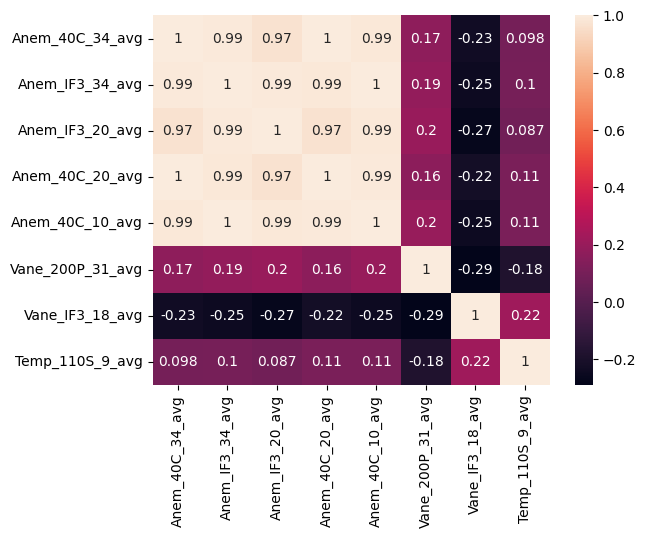

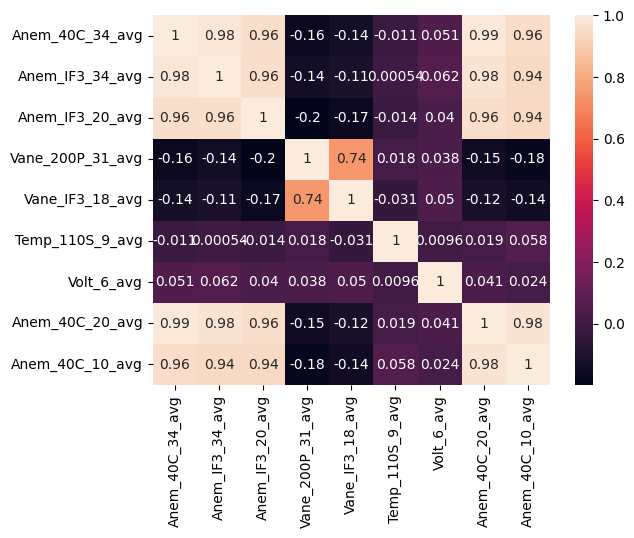

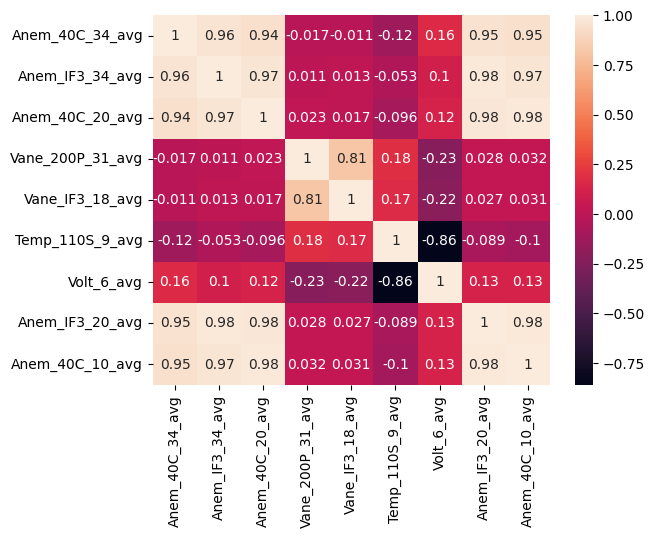

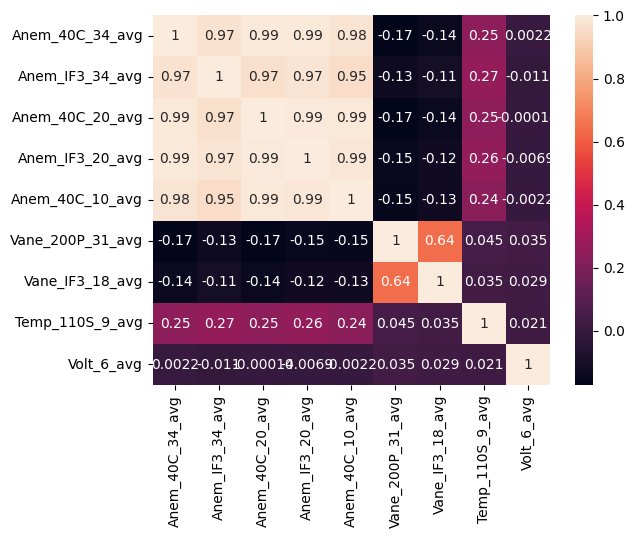

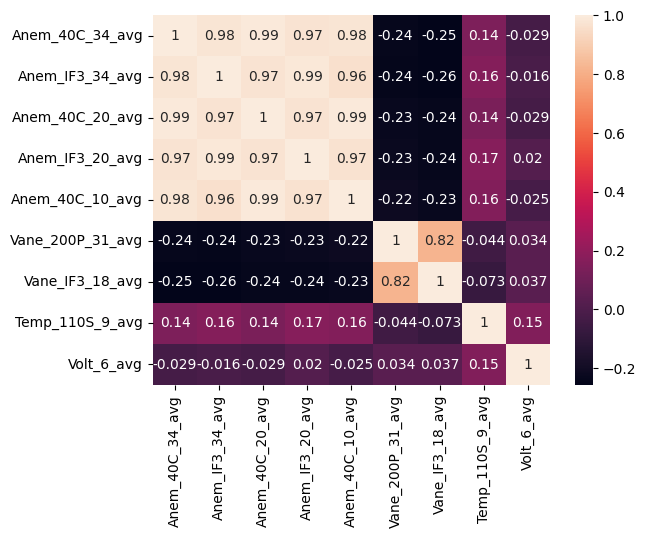

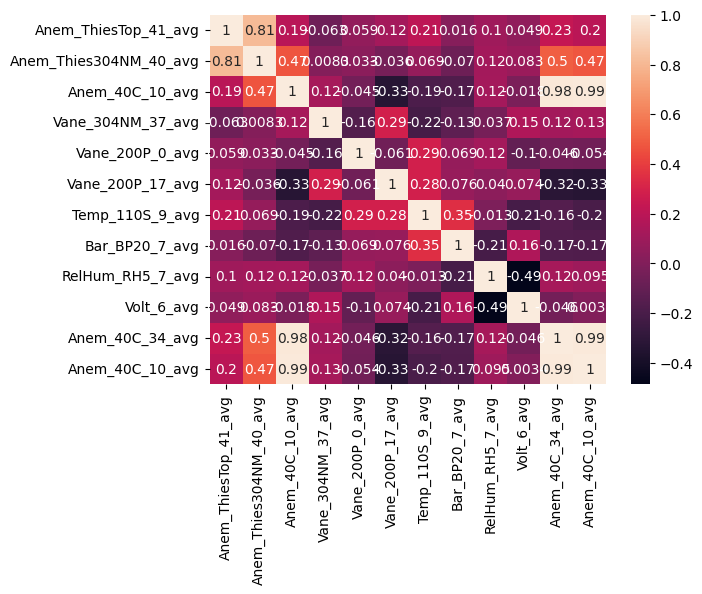

In [6]:
#проходимся по всем файлам и строим матрицы корреляции
for output_name in dict_ouput_files:
    makeCorrelationMatrix(output_name)

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#значения VIF и мультиколлинеарность:
#VIF = 1: Отсутствие мультиколлинеарности.
#1 < VIF < 5: Умеренная мультиколлинеарность.
#VIF >= 5 или 10: Высокая мультиколлинеарность, которая может влиять на надёжность оценок коэффициентов регрессии.

def calcVIF(output_name):
    output_file_path = directory + output_name + '_int.csv'
    data = pd.read_csv(output_file_path)
    
    # Выбор столбцов, оканчивающихся на '_avg'
    columns_to_keep = [col for col in data.columns if col.endswith('_avg')]
    #columns_to_keep.insert(0, 'date')  # Вставляем 'date' обратно в список, если он был удален
    data = data[columns_to_keep]
    
    # Расчет VIF для каждой переменной
    vif_data = pd.DataFrame()
    vif_data["feature"] = data.columns
    vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    
    print(vif_data)



In [8]:
#проходимся по всем файлам и проверяем на мультиколинеарность
for output_name in dict_ouput_files:
    calcVIF(output_name)

            feature          VIF
0   Anem_40C_34_avg   925.640944
1   Anem_IF3_34_avg   812.571846
2   Anem_IF3_20_avg   391.484649
3   Anem_40C_20_avg  1459.167684
4   Anem_40C_10_avg   816.880827
5  Vane_200P_31_avg     5.717922
6   Vane_IF3_18_avg     1.676632
7   Temp_110S_9_avg     1.274005
            feature         VIF
0   Anem_40C_34_avg  248.796165
1   Anem_IF3_34_avg  114.707243
2   Anem_IF3_20_avg   50.802359
3  Vane_200P_31_avg    6.759288
4   Vane_IF3_18_avg    7.119776
5   Temp_110S_9_avg    1.104442
6        Volt_6_avg    7.641353
7   Anem_40C_20_avg  312.973860
8   Anem_40C_10_avg   83.616075
            feature         VIF
0   Anem_40C_34_avg   35.560833
1   Anem_IF3_34_avg   87.502509
2   Anem_40C_20_avg   89.204383
3  Vane_200P_31_avg    8.705987
4   Vane_IF3_18_avg    7.918617
5   Temp_110S_9_avg    1.148138
6        Volt_6_avg    4.730482
7   Anem_IF3_20_avg  154.605705
8   Anem_40C_10_avg  120.889097
            feature         VIF
0   Anem_40C_34_avg  158.313718

In [18]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

def defineSeason(output_name):
    output_file_path = directory + output_name + '_int.csv'
    data = pd.read_csv(output_file_path)    
    data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d %H:%M:%S')
    
    # Выбор столбцов, оканчивающихся на '_avg'
    columns_to_keep = [col for col in data.columns if col.endswith('_avg')]
    columns_to_keep.insert(0, 'date')  # Вставляем 'date' обратно в список

    # Создаем временные столбцы для десезонированных данных
    for column in columns_to_keep:
        if column == 'date':
            continue

        # Определение периода сезонности
        seasonal_period = 12

        # Сезонное разложение
        decomposition = sm.tsa.seasonal_decompose(data[column], model='additive', period=seasonal_period, extrapolate_trend='freq')

        # Сохранение десезонированных данных во временный столбец
        data[f'temp_{column}'] = data[column] - decomposition.seasonal

        # Визуализация результатов
        plt.figure(figsize=(12, 8))
        plt.subplot(311)
        plt.plot(data['date'], data[column], label=f'Original {column}')
        plt.legend(loc='upper left')
        plt.subplot(312)
        plt.plot(data['date'], decomposition.seasonal, label=f'Seasonal {column}')
        plt.legend(loc='upper left')
        plt.subplot(313)
        plt.plot(data['date'], data[f'temp_{column}'], label=f'Deseasonalized {column}')
        plt.legend(loc='upper left')
        plt.tight_layout()
        plt.show()

    # Перезаписываем оригинальные столбцы десезонированными данными
    for column in columns_to_keep:
        if column == 'date':
            continue
        data[column] = data[f'temp_{column}']
        data.drop(columns=[f'temp_{column}'], inplace=True)

    # Сохранение измененного DataFrame обратно в файл
    output_modified_path = directory + output_name + '_int_modified.csv'
    data.to_csv(output_modified_path, index=False)



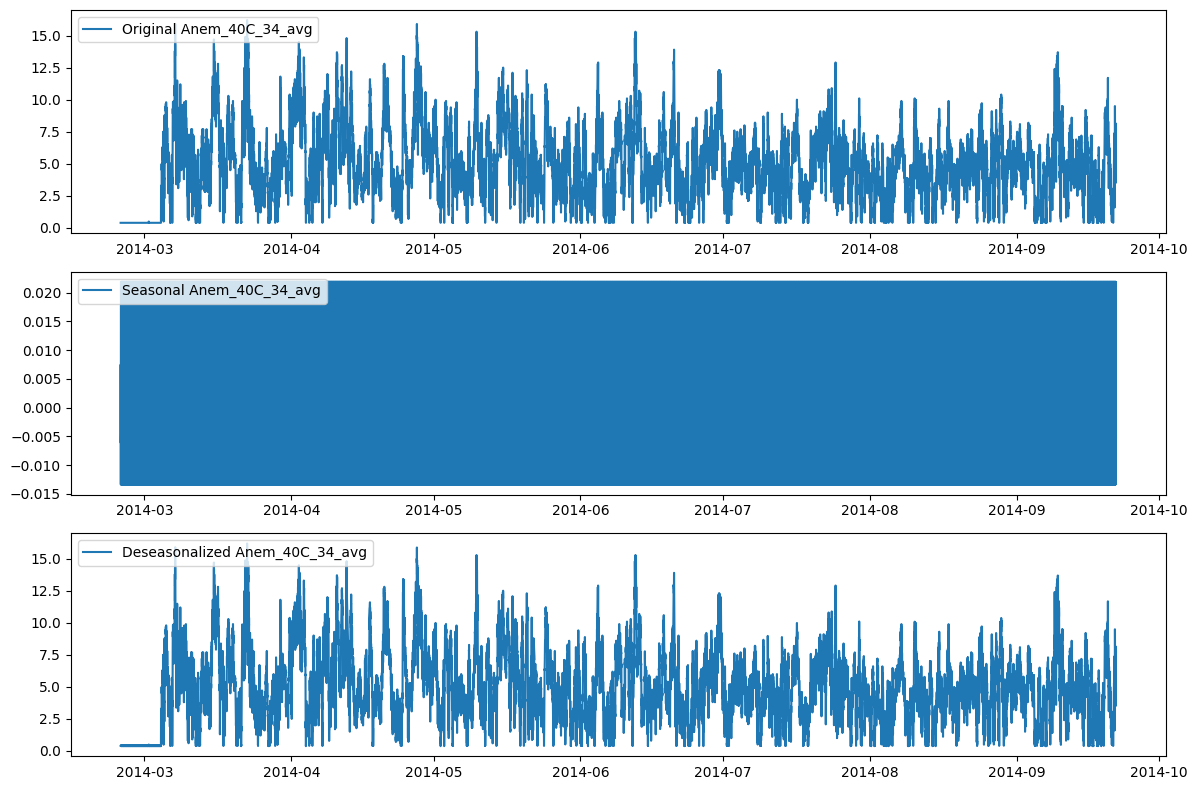

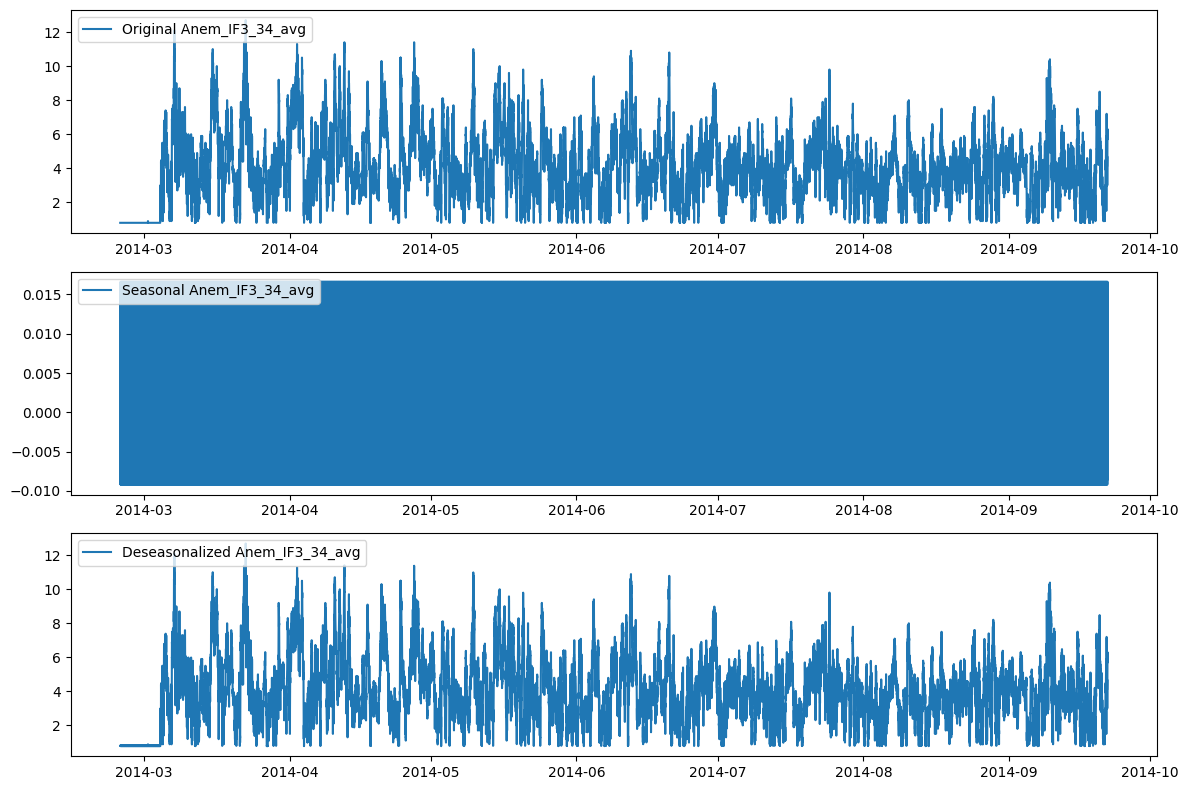

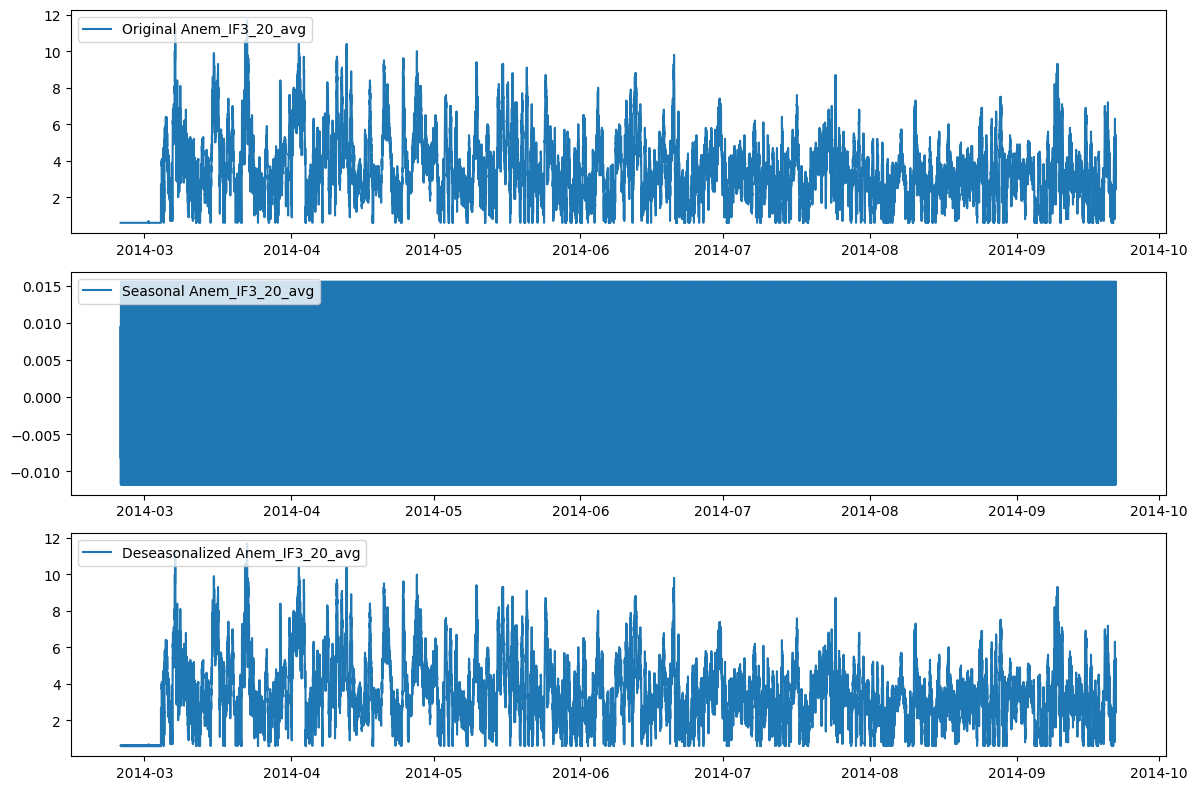

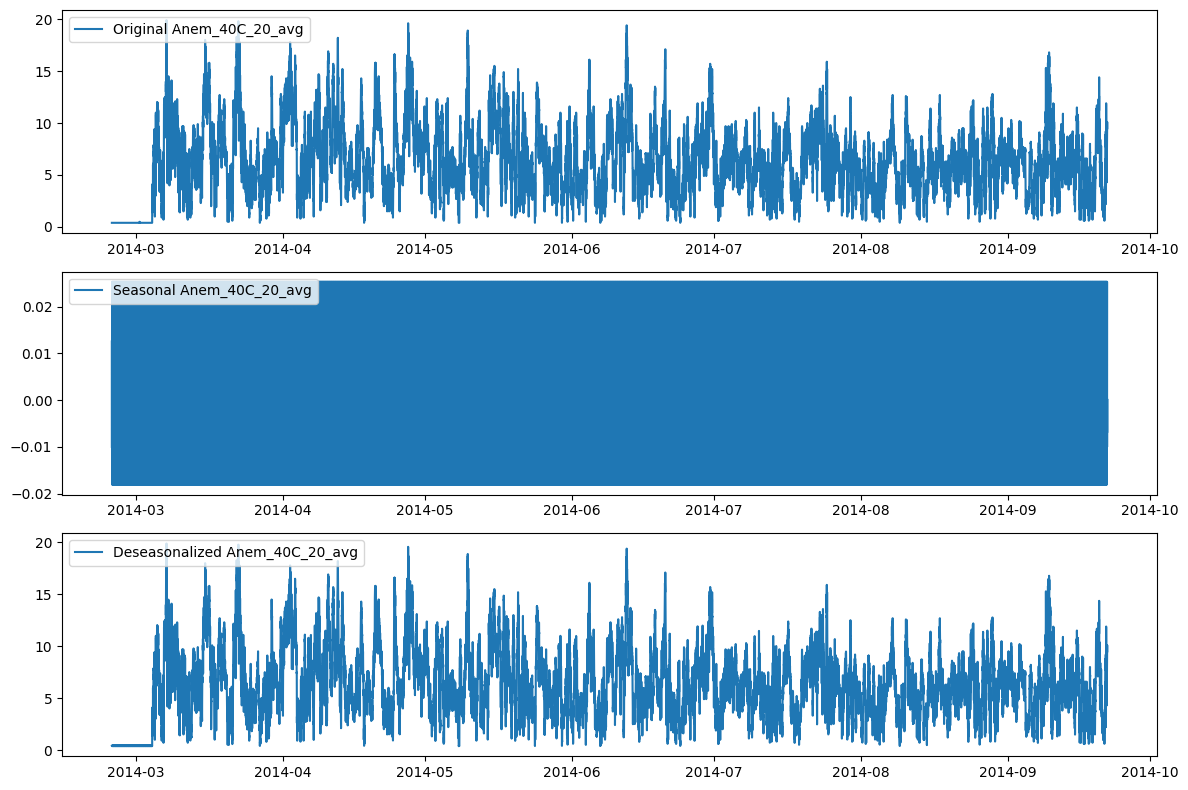

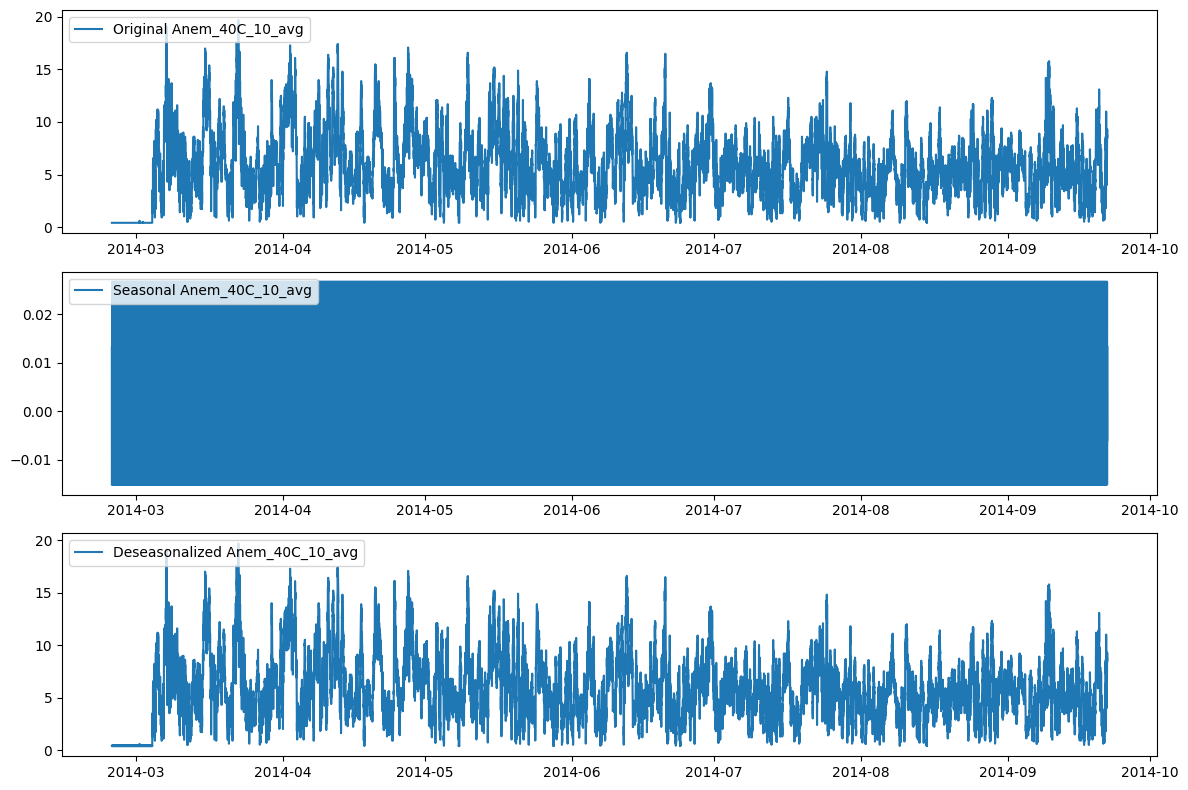

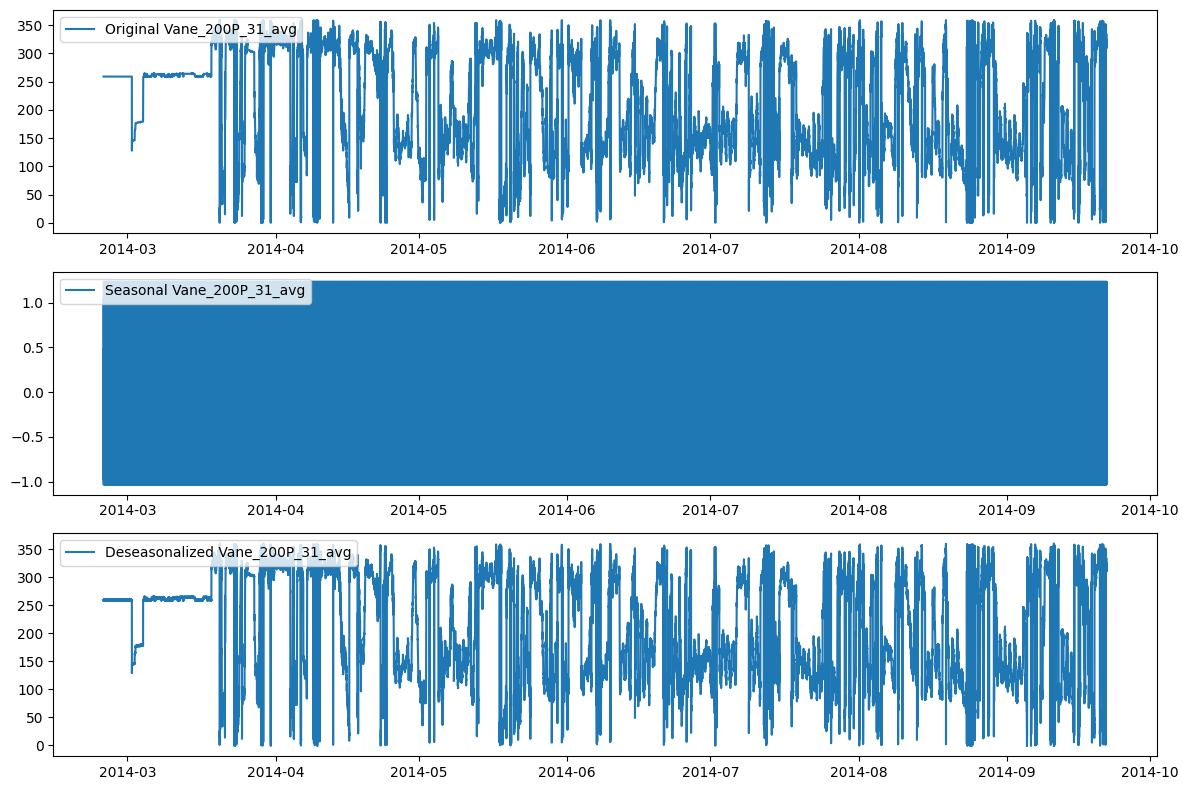

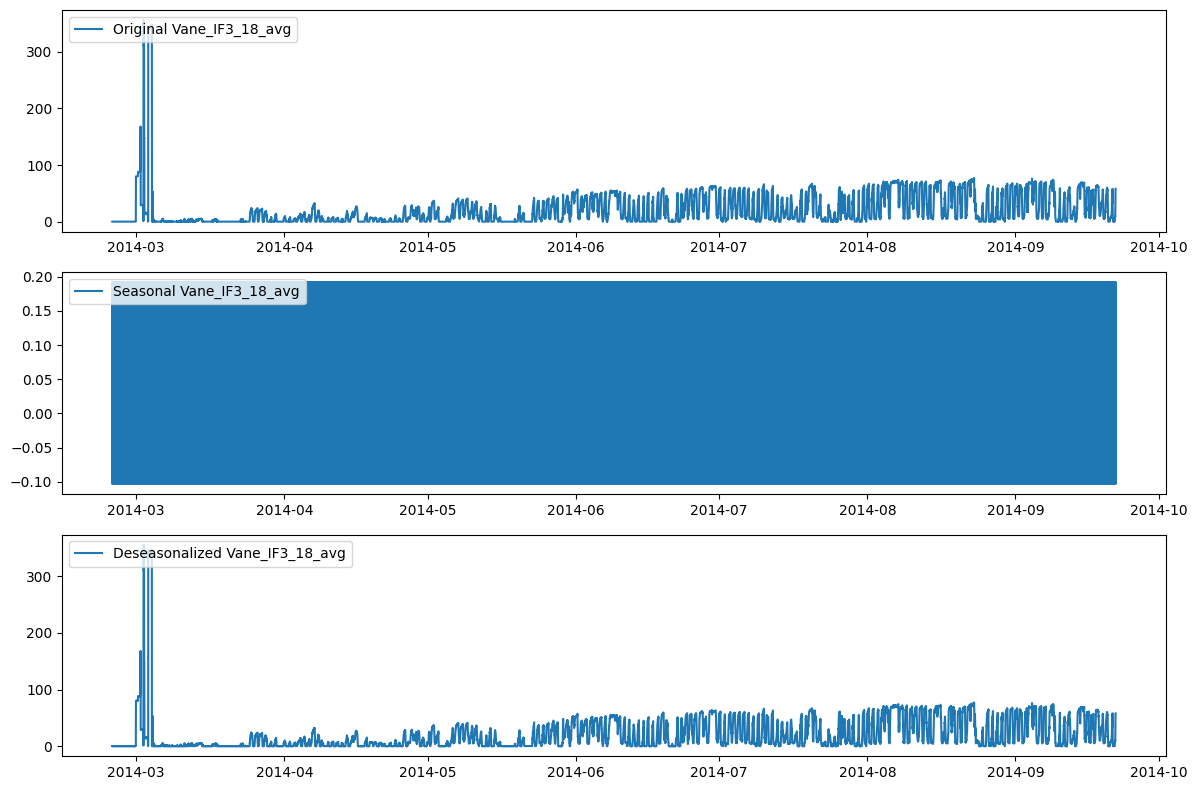

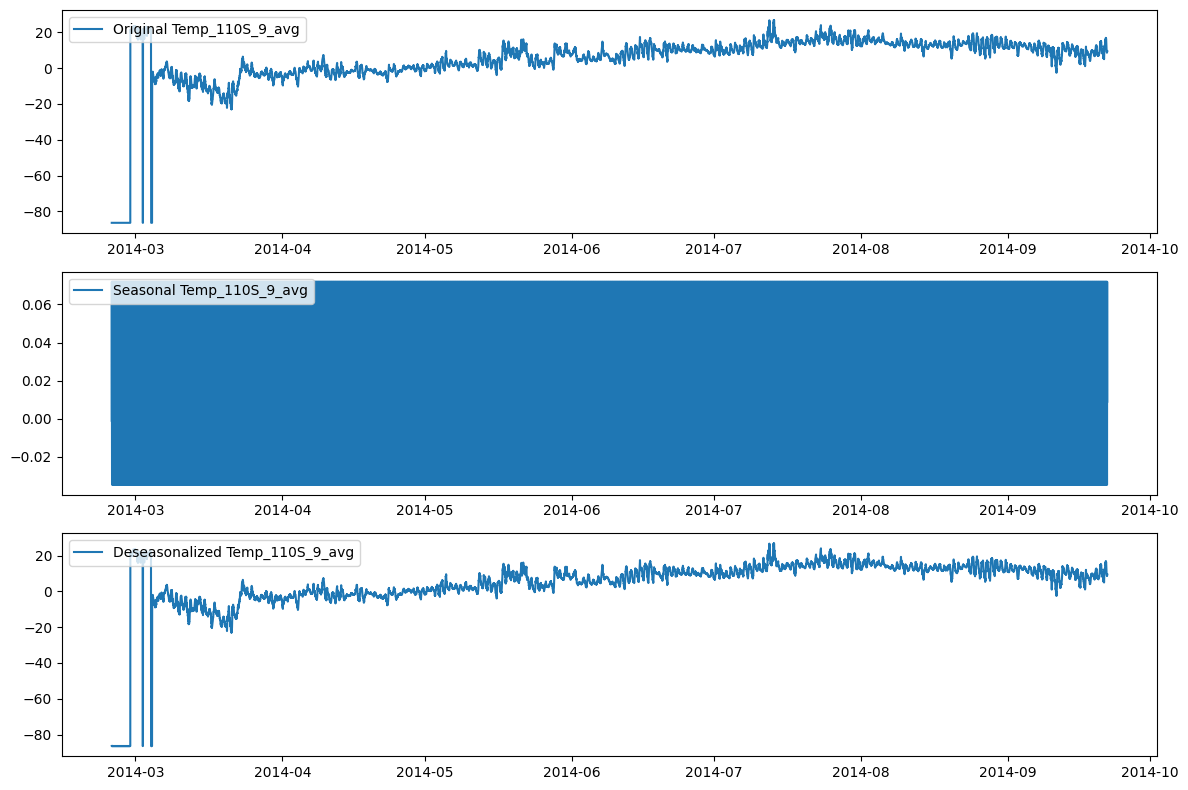

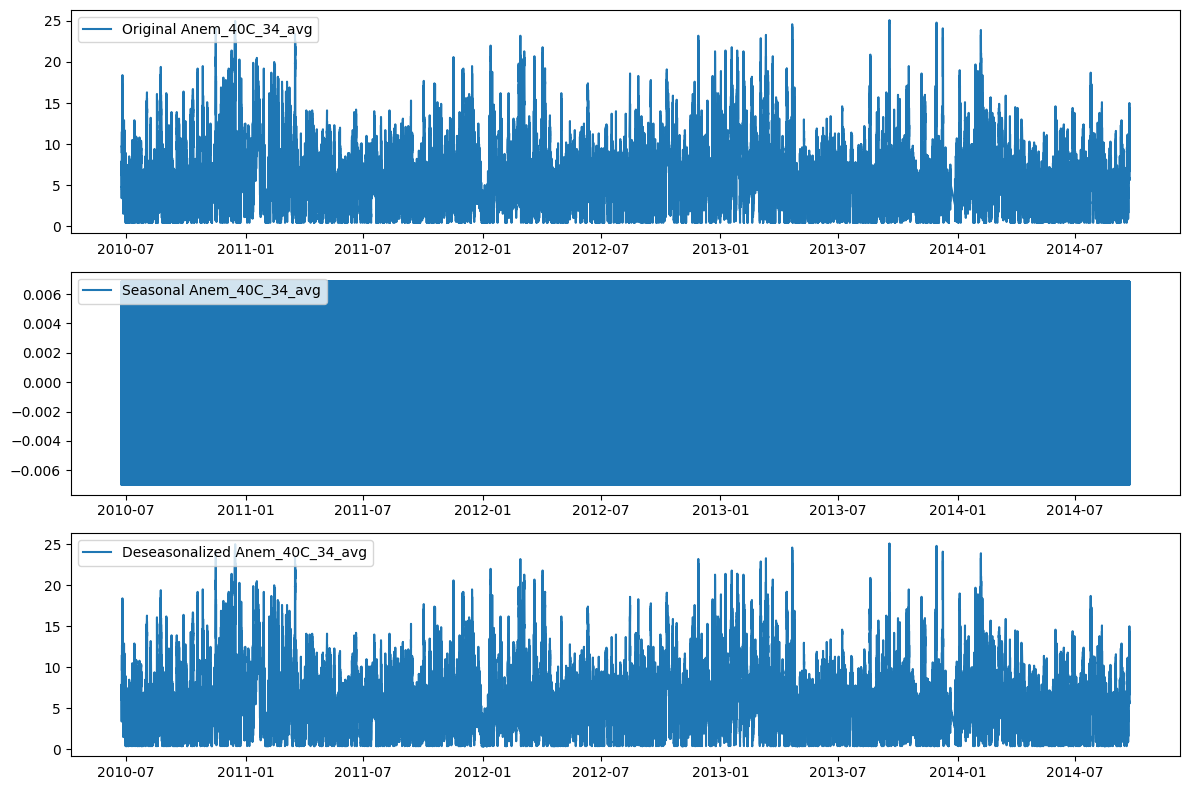

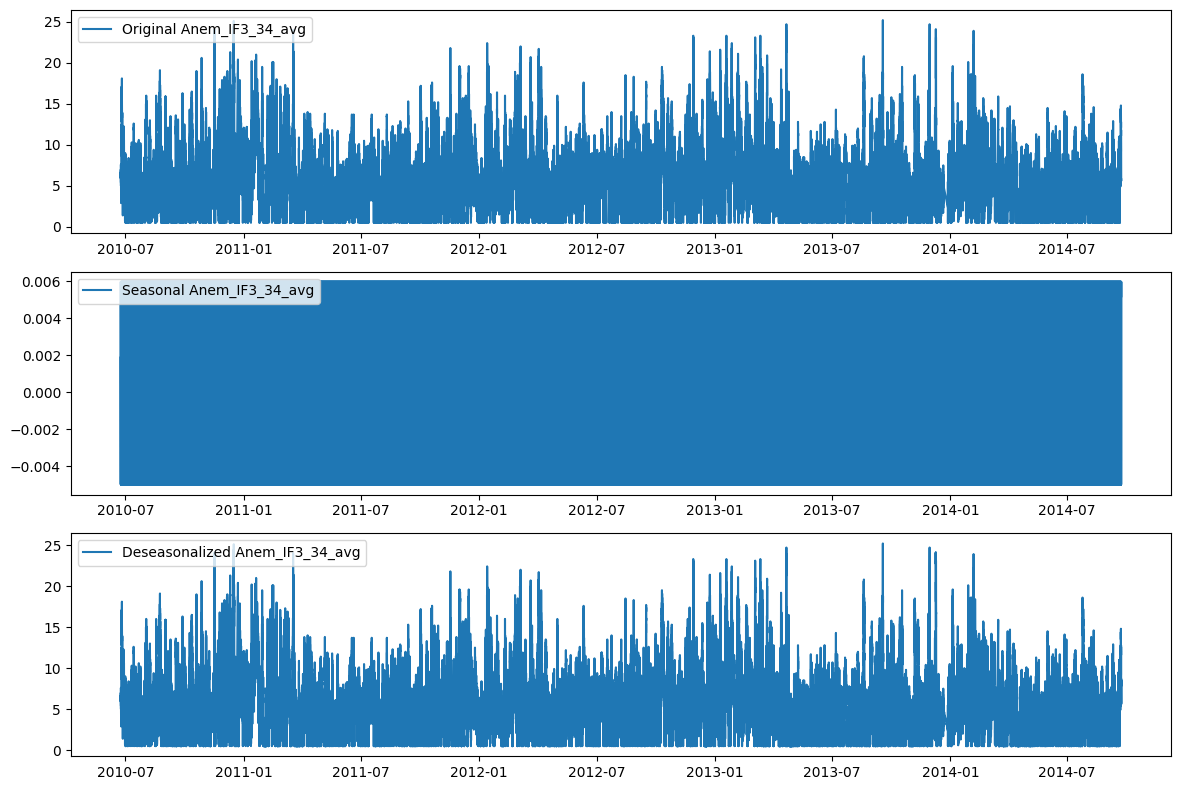

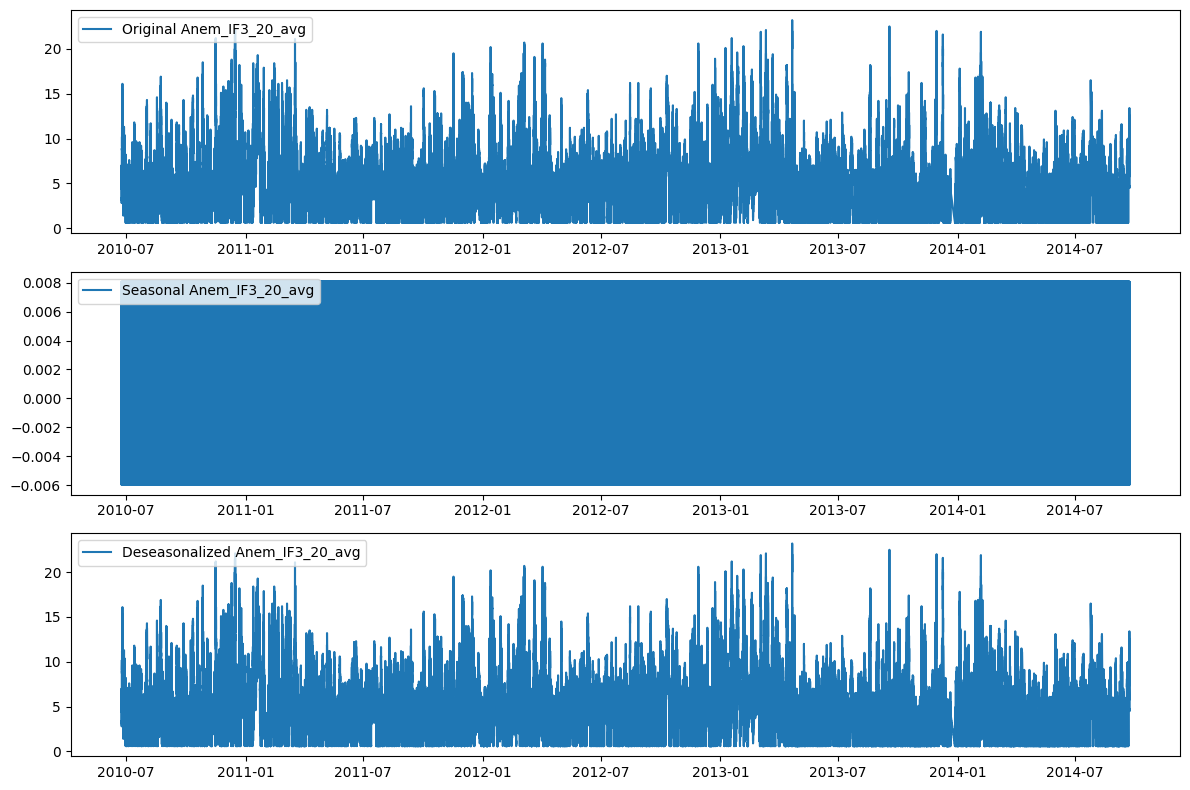

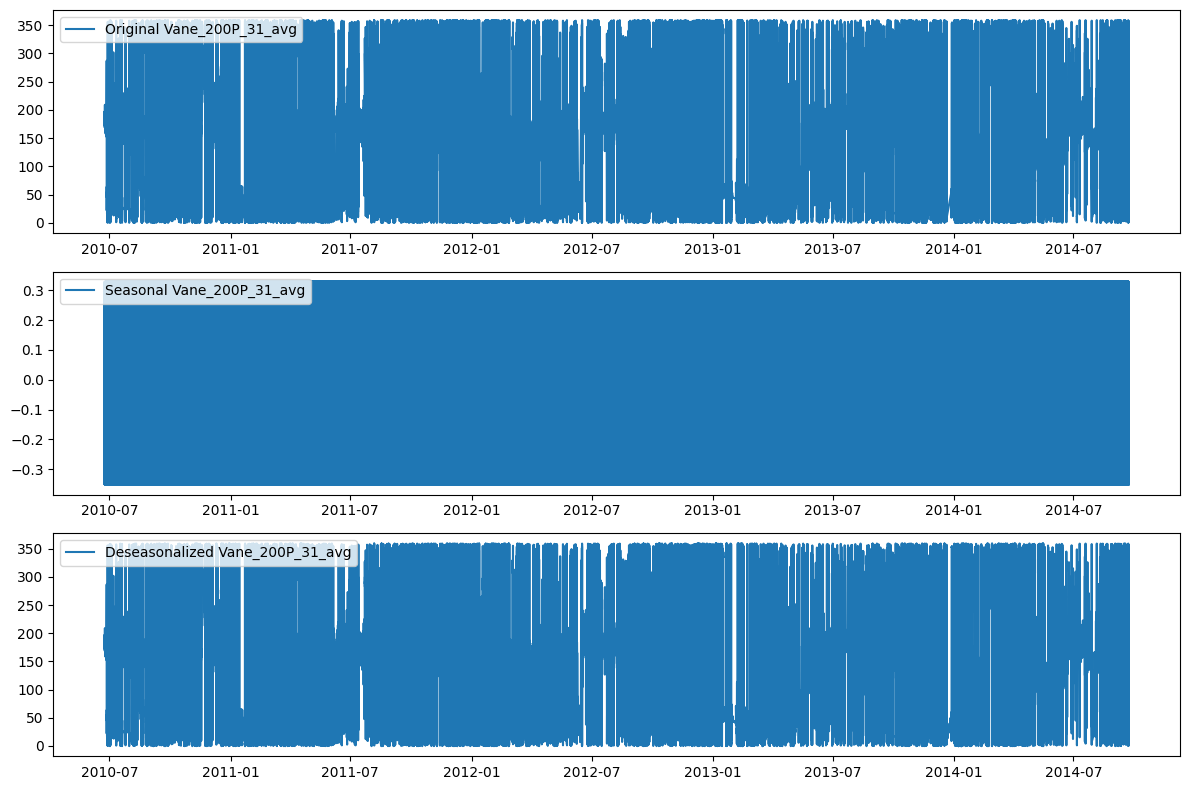

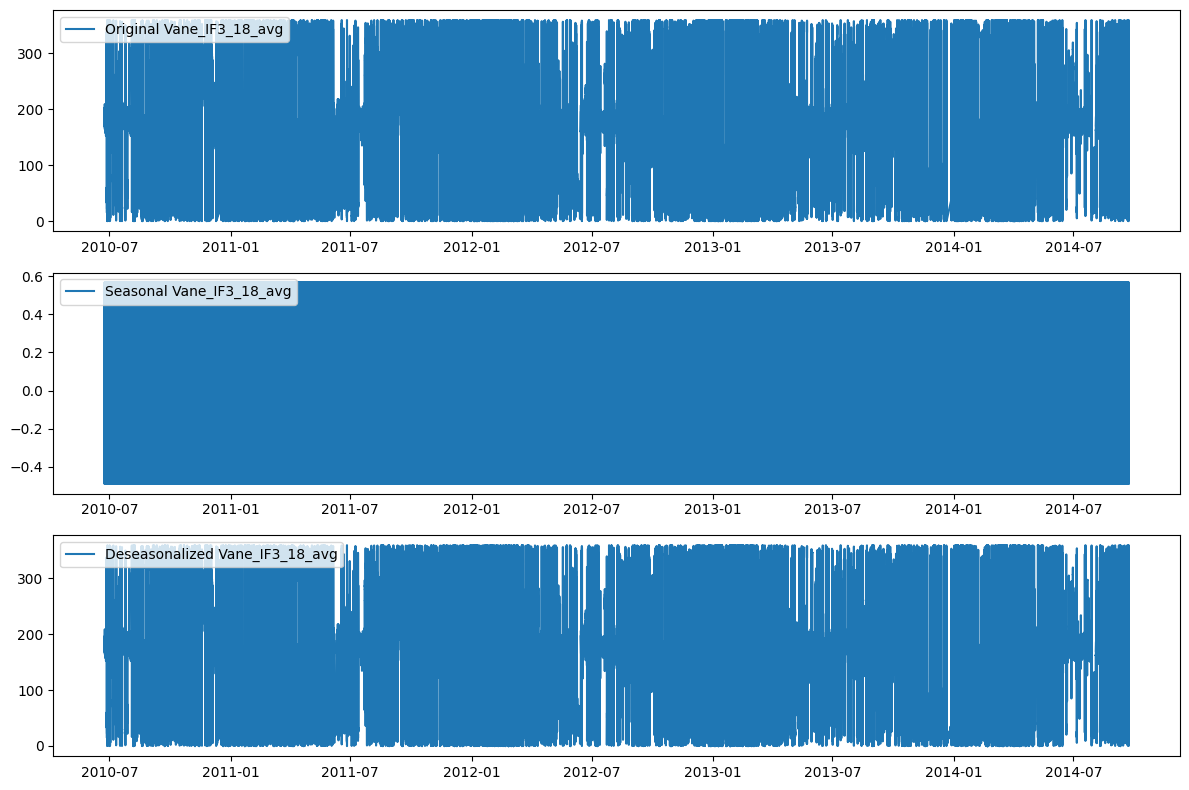

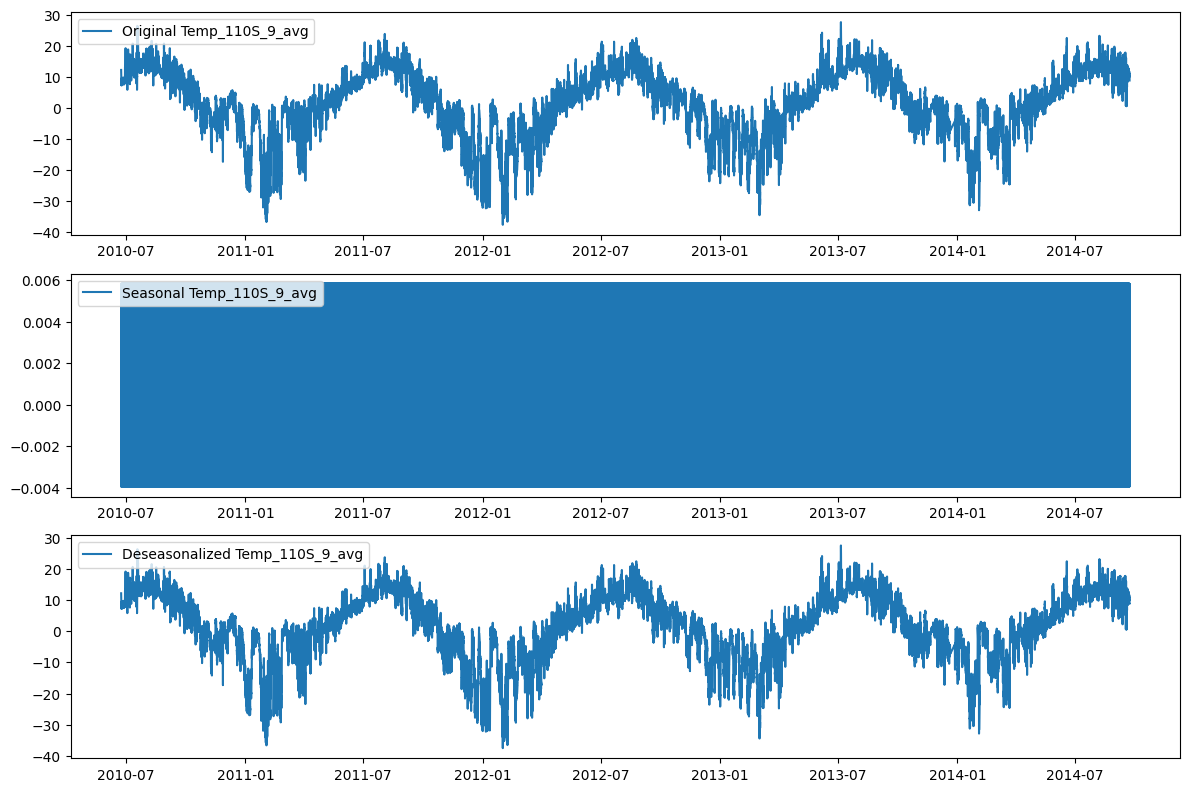

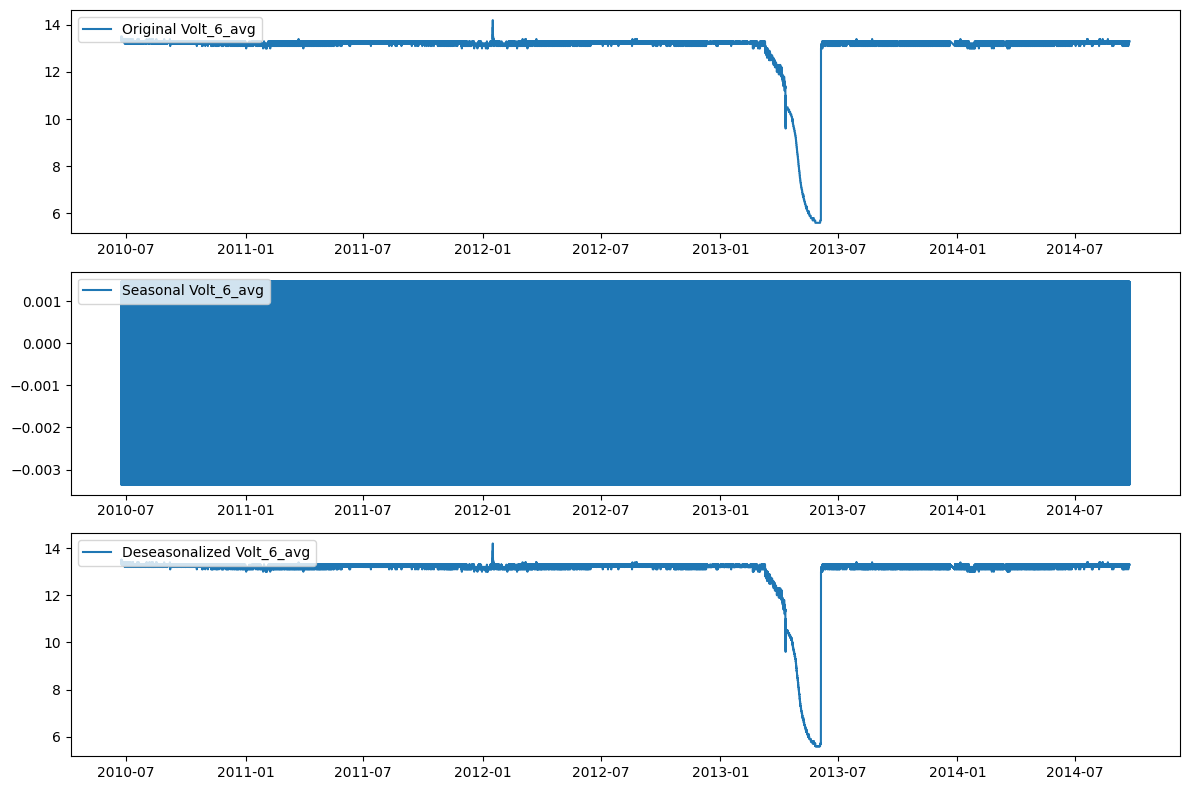

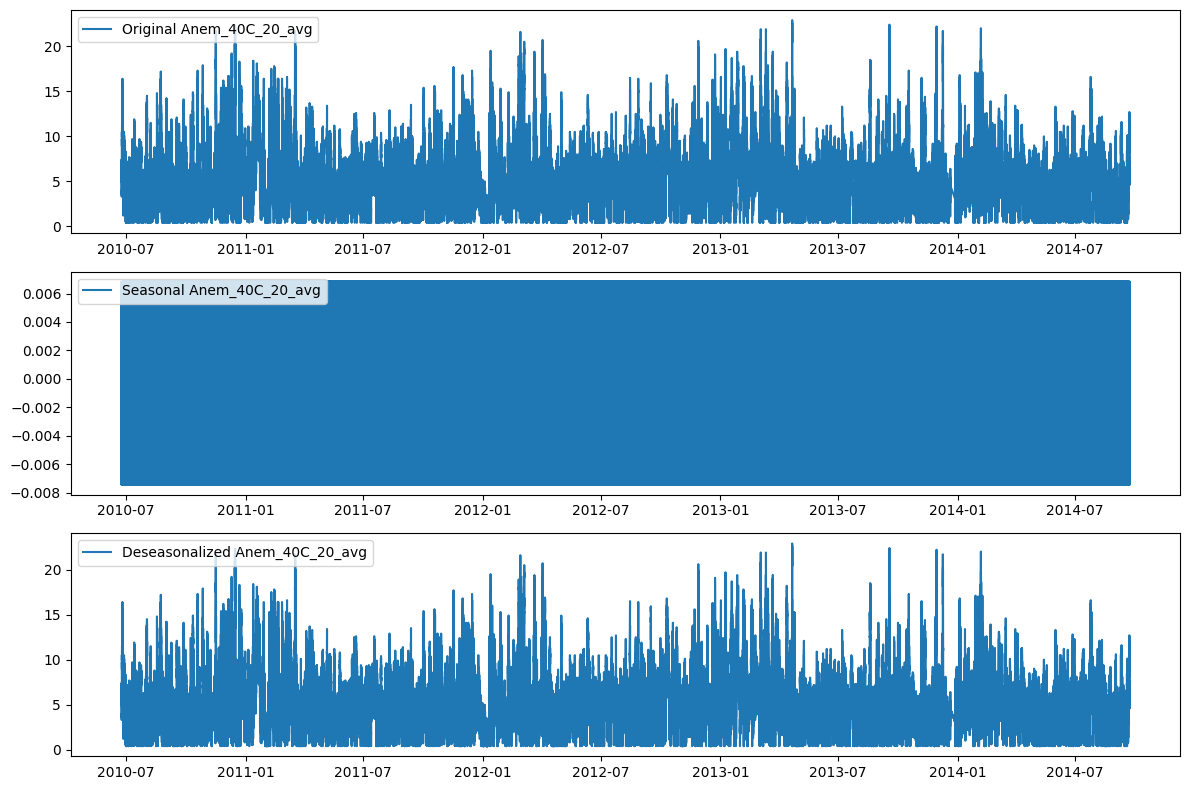

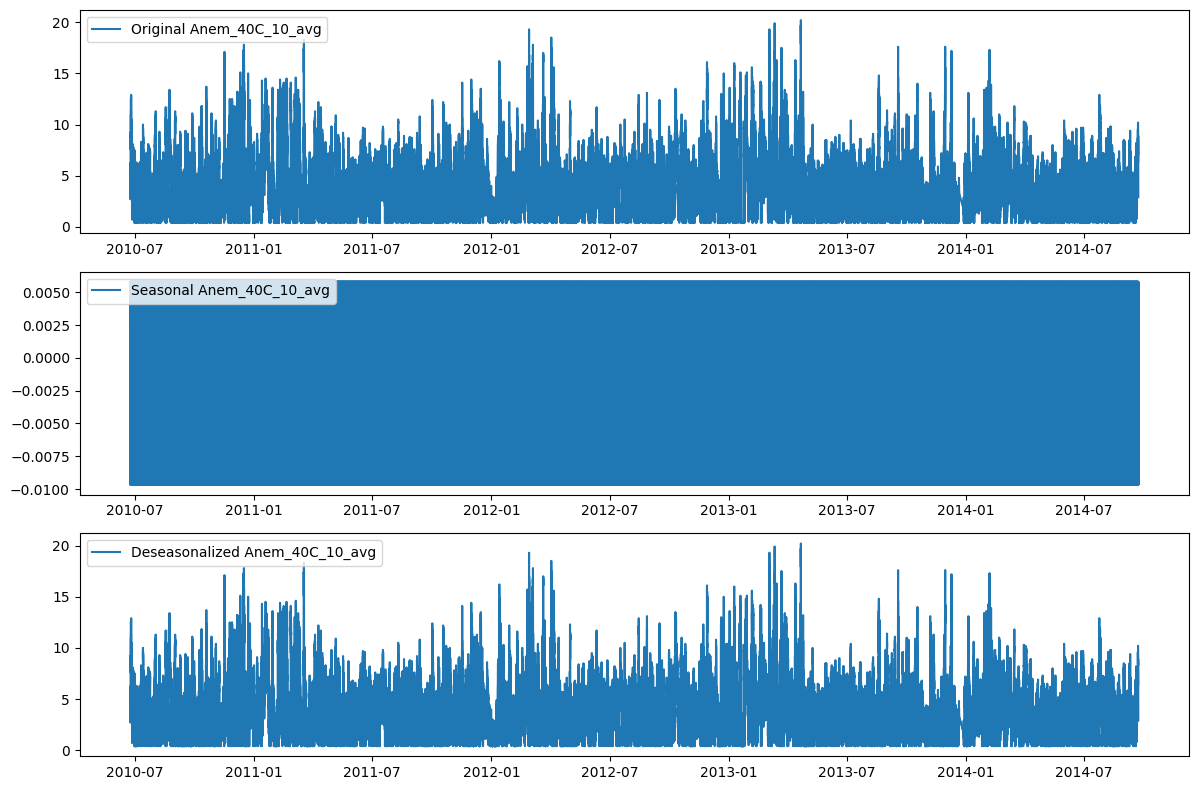

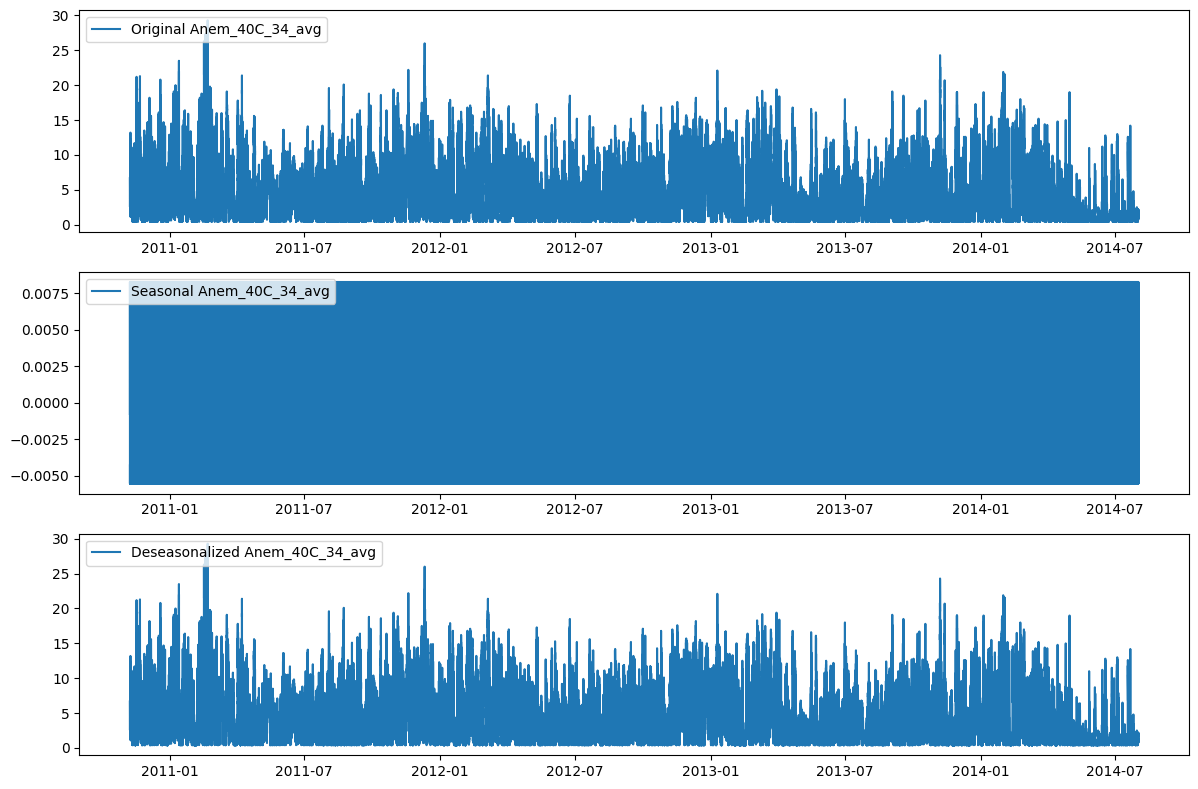

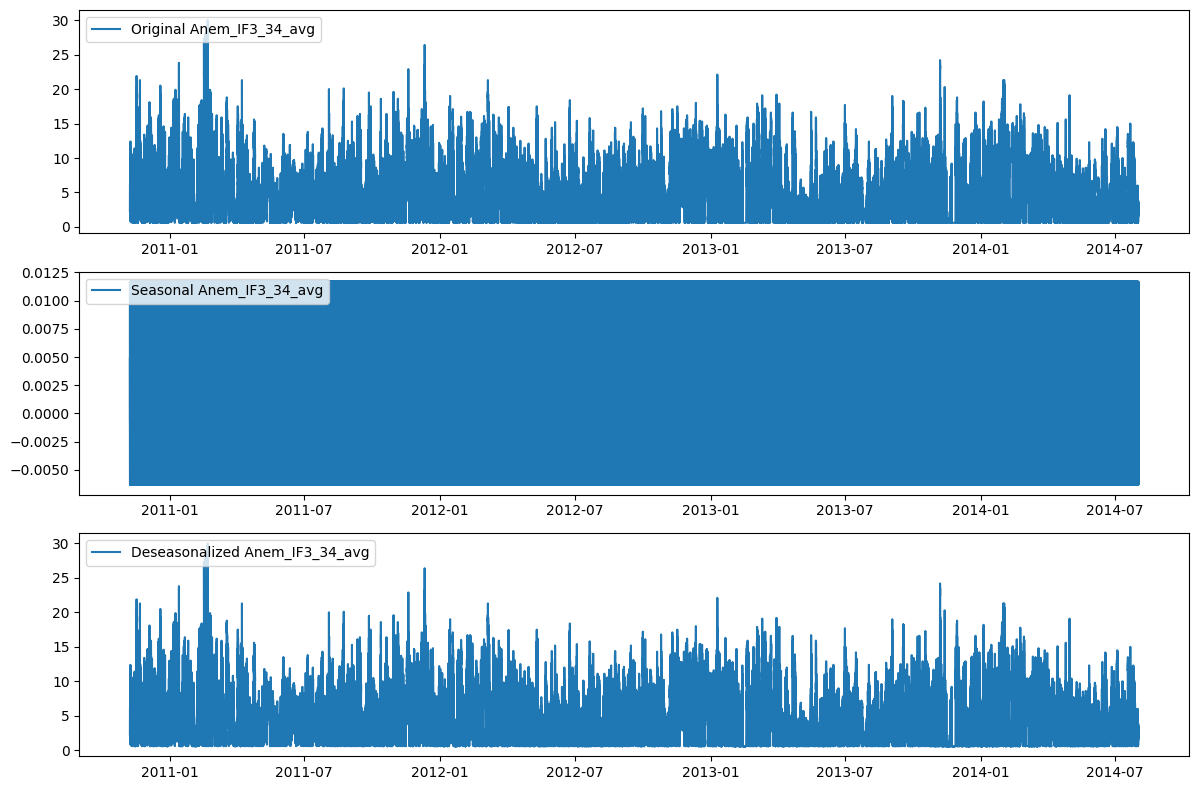

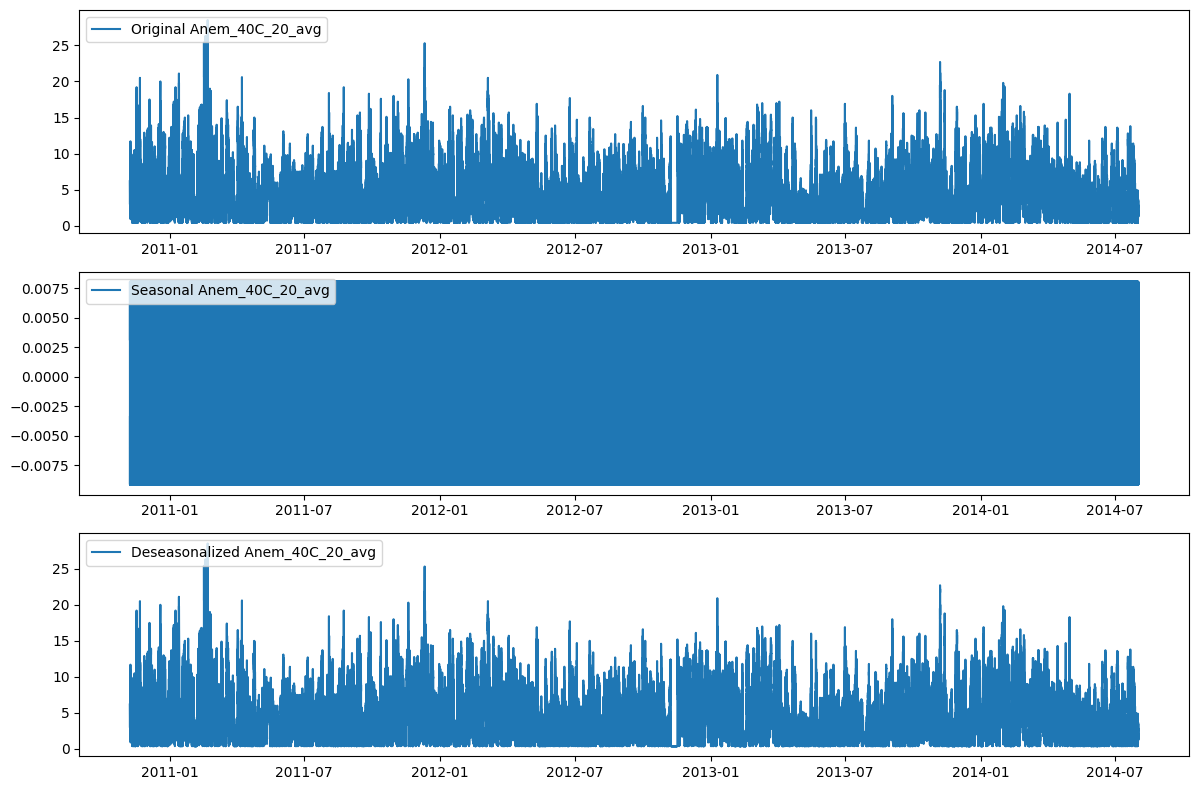

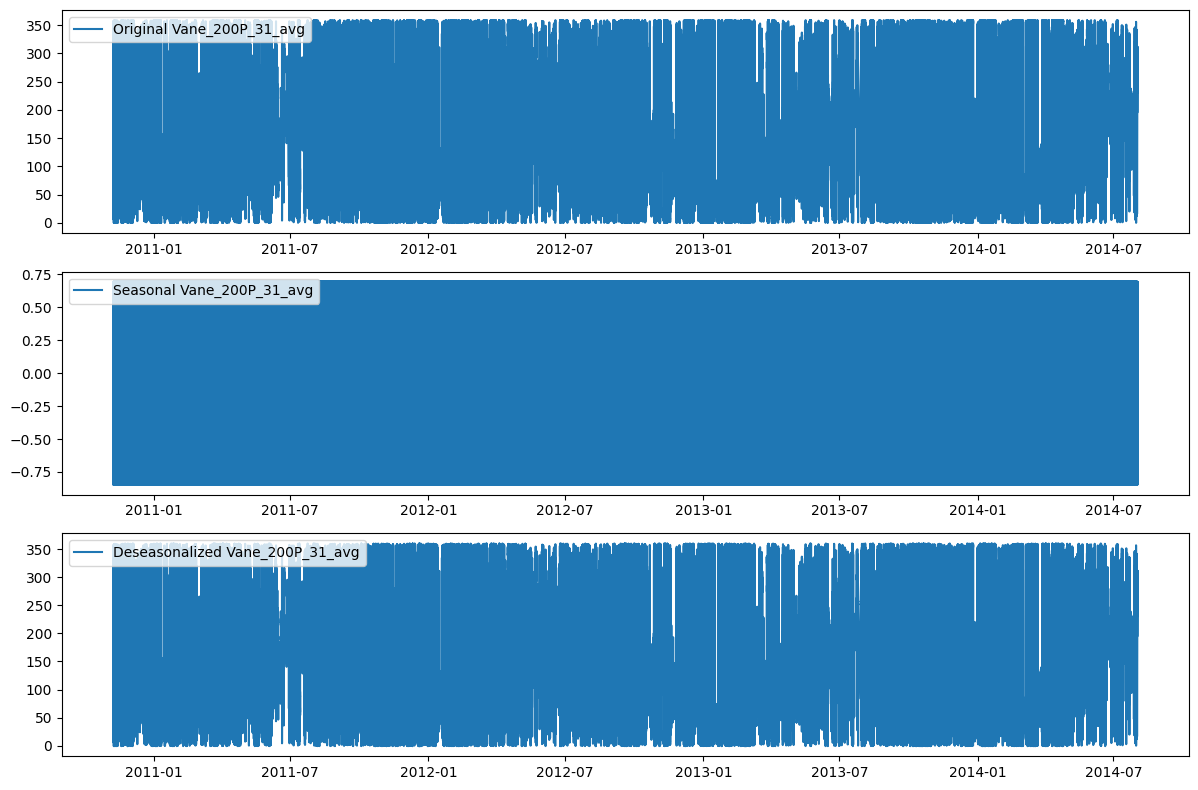

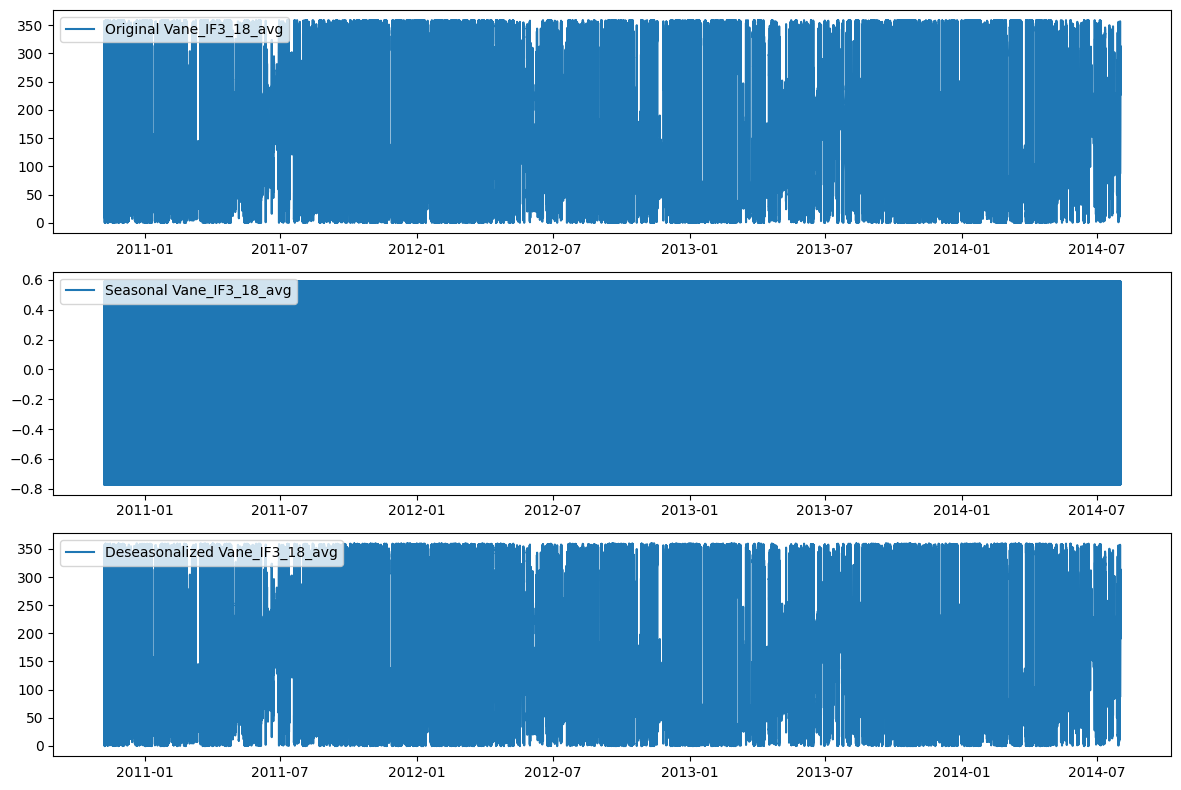

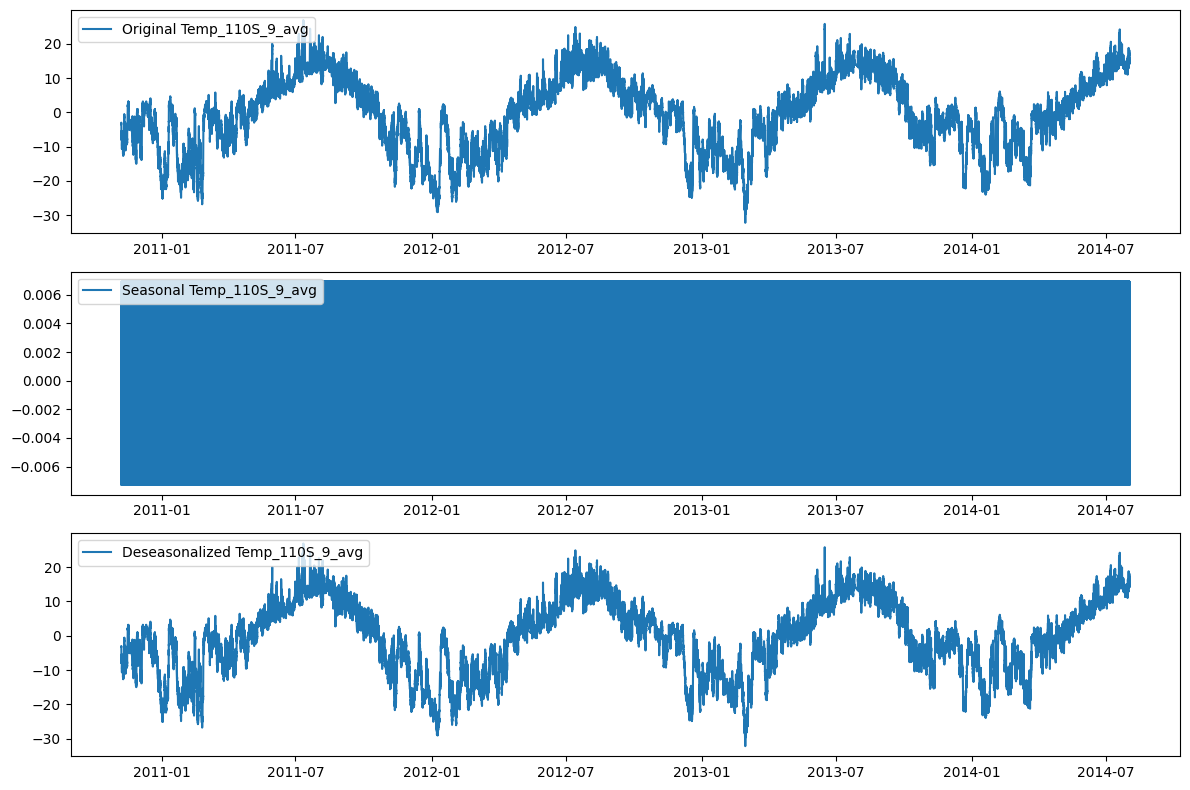

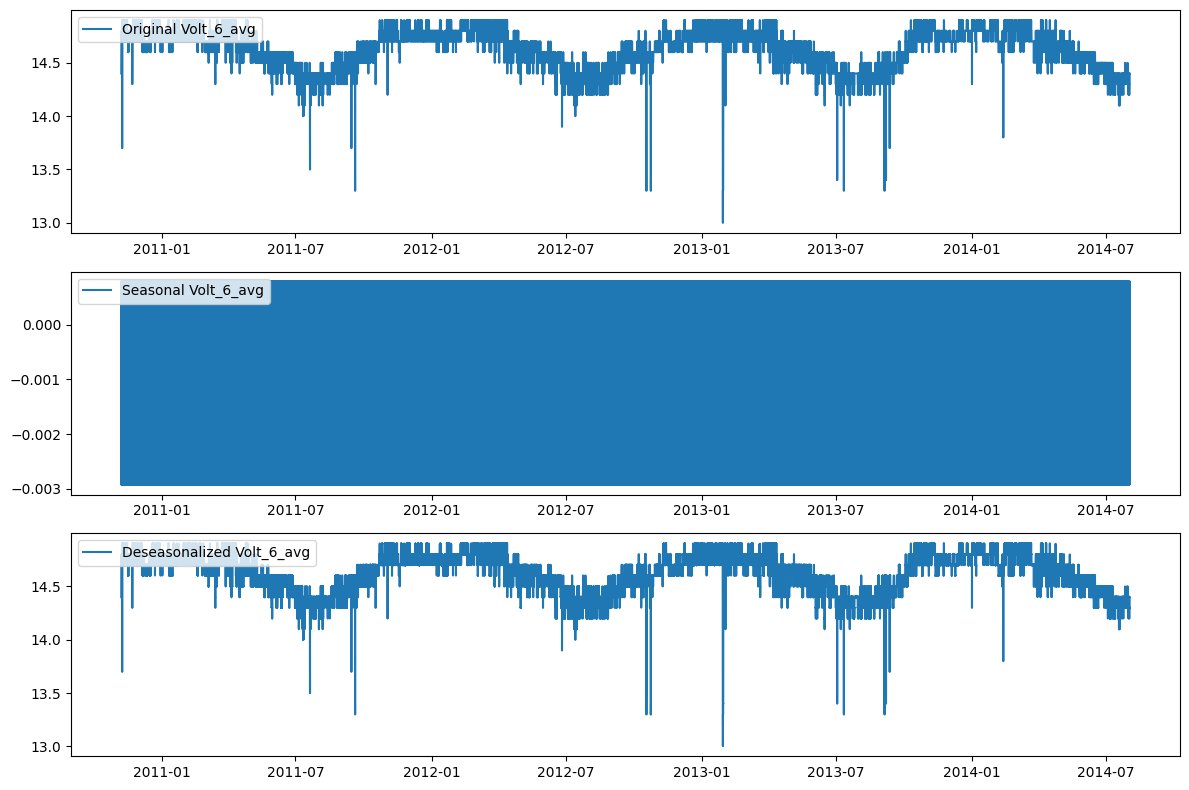

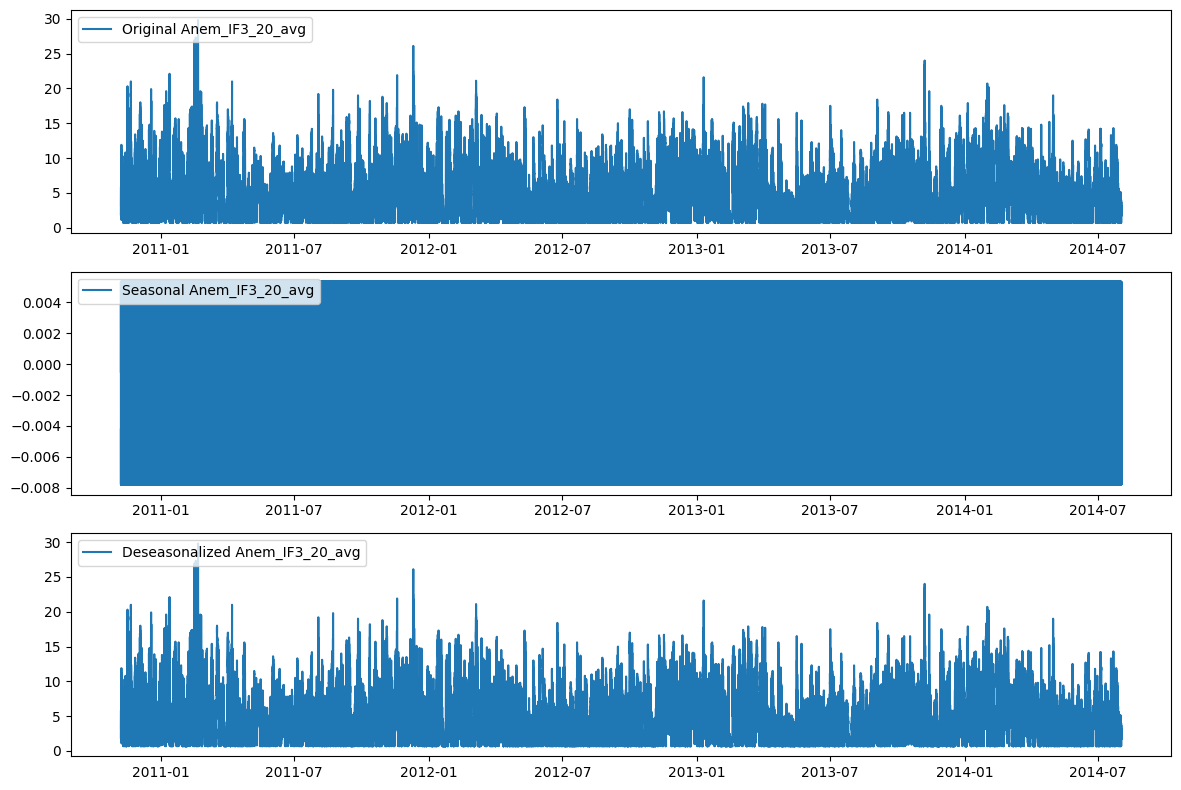

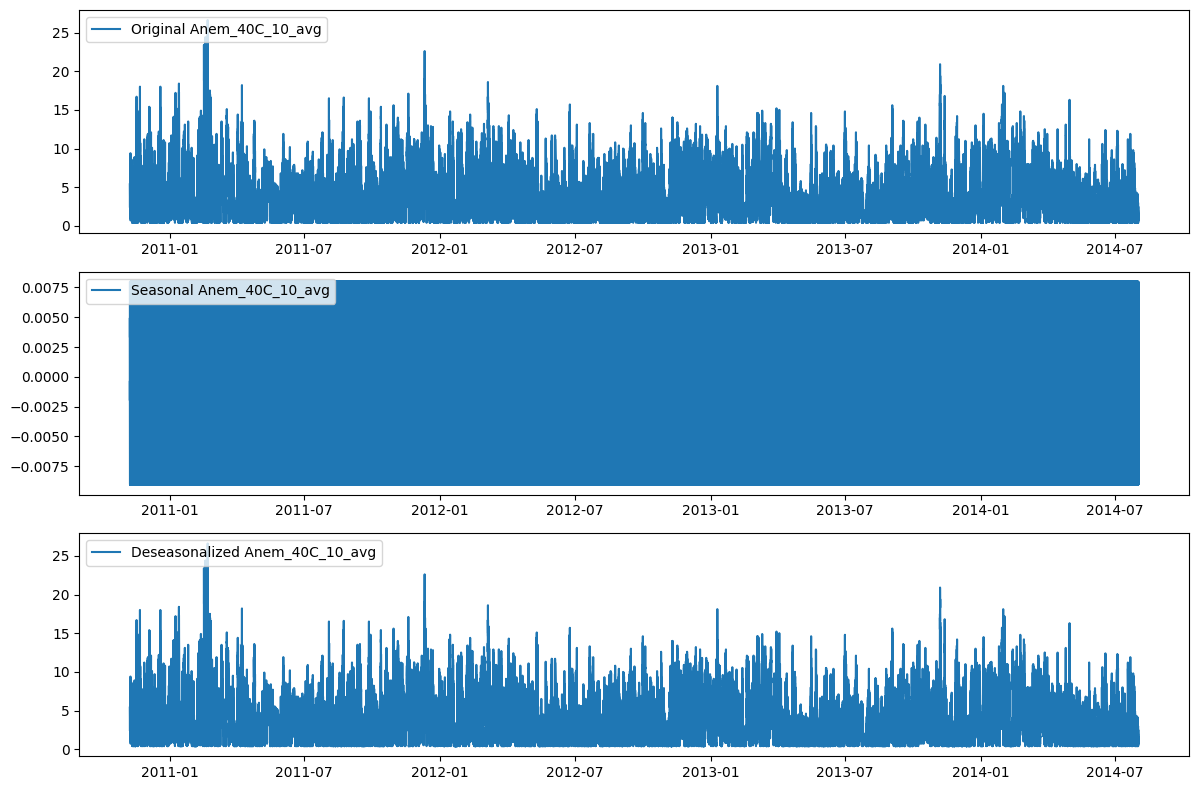

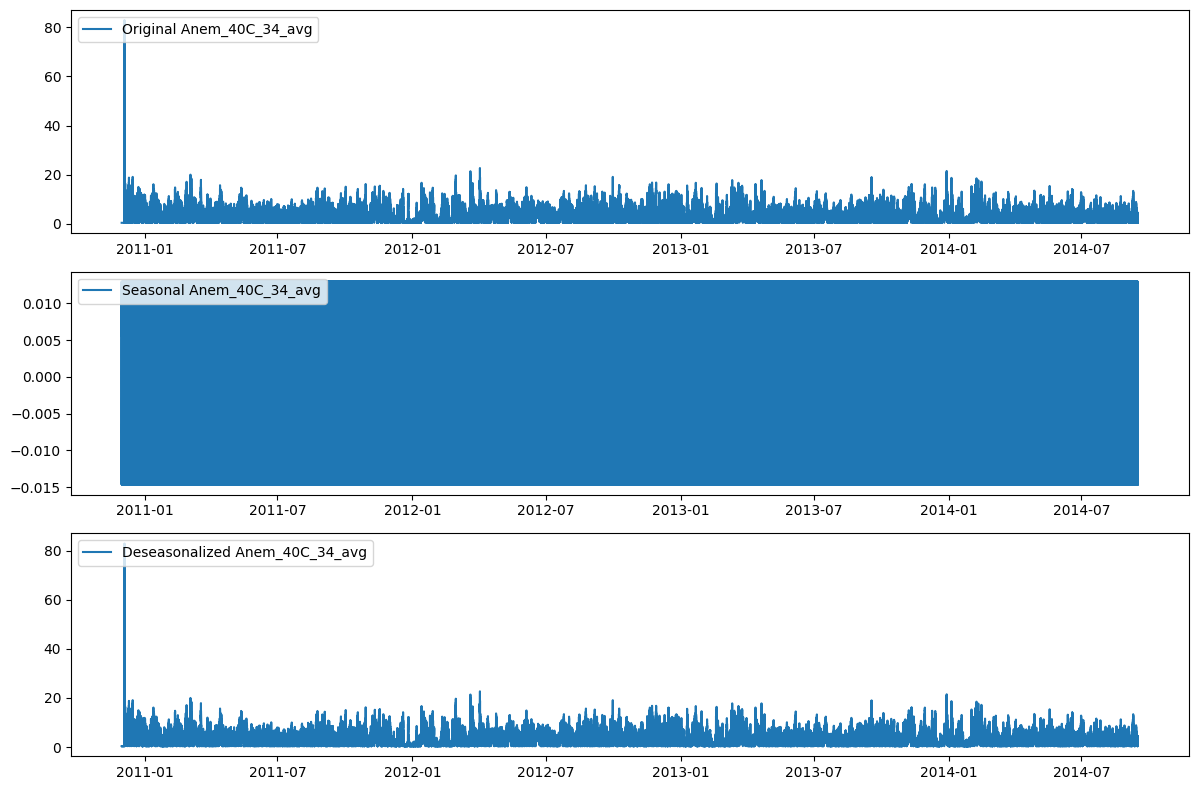

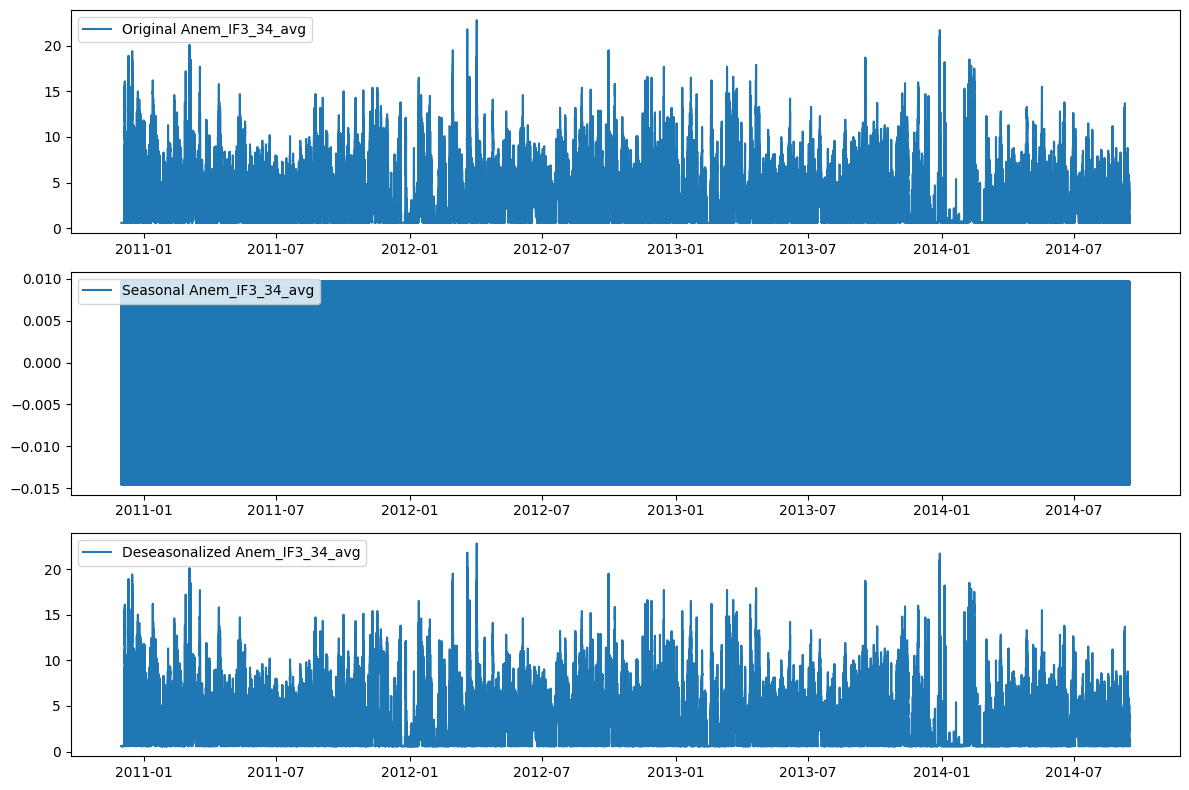

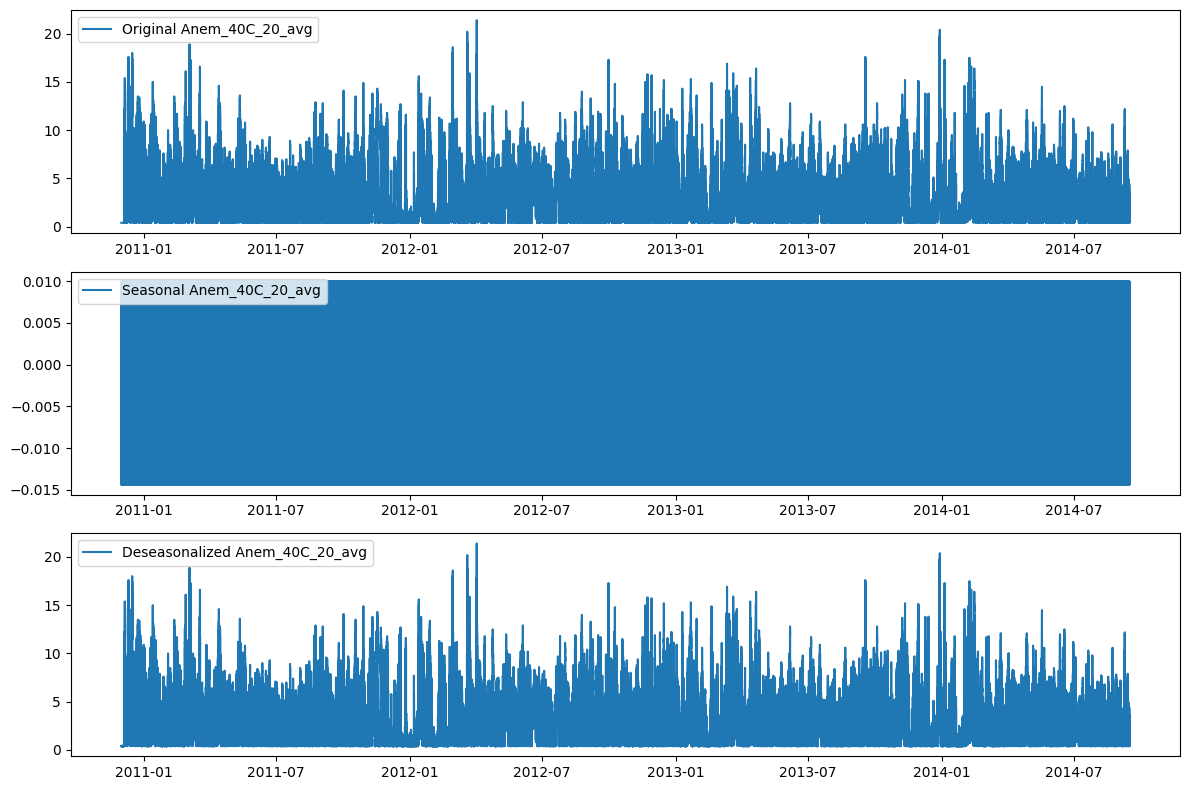

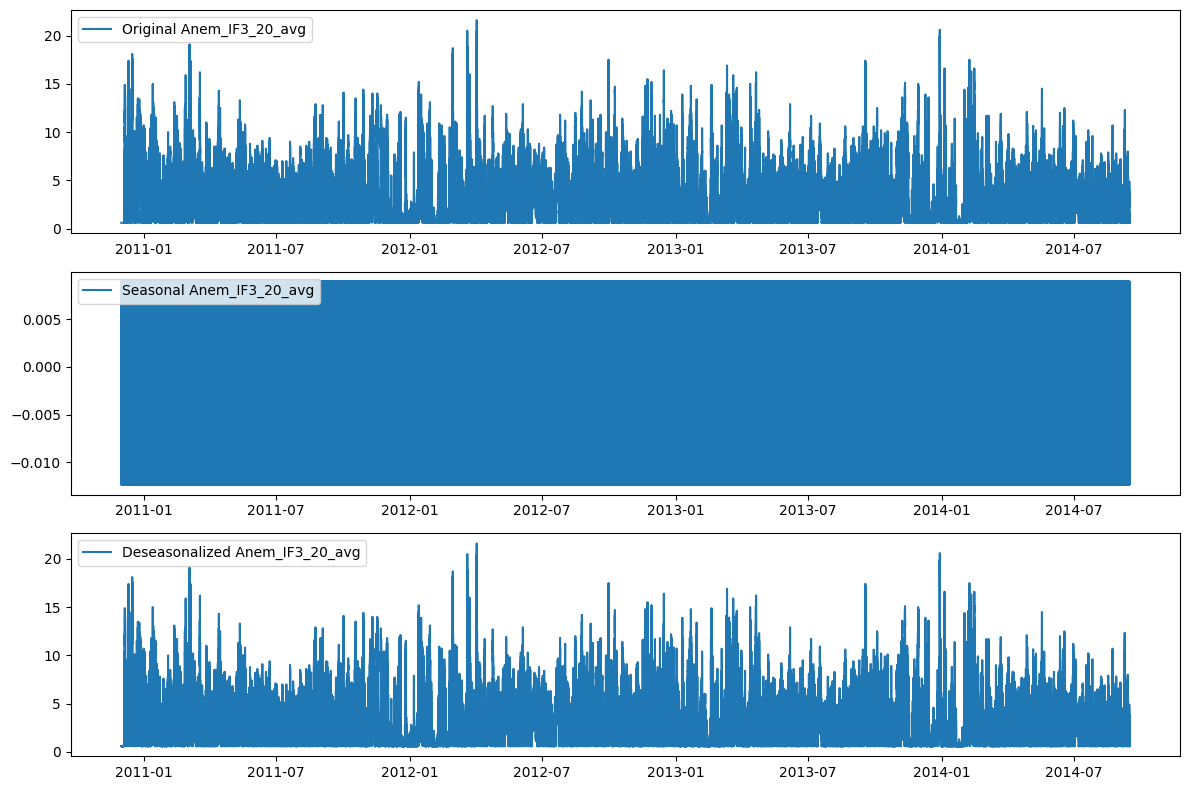

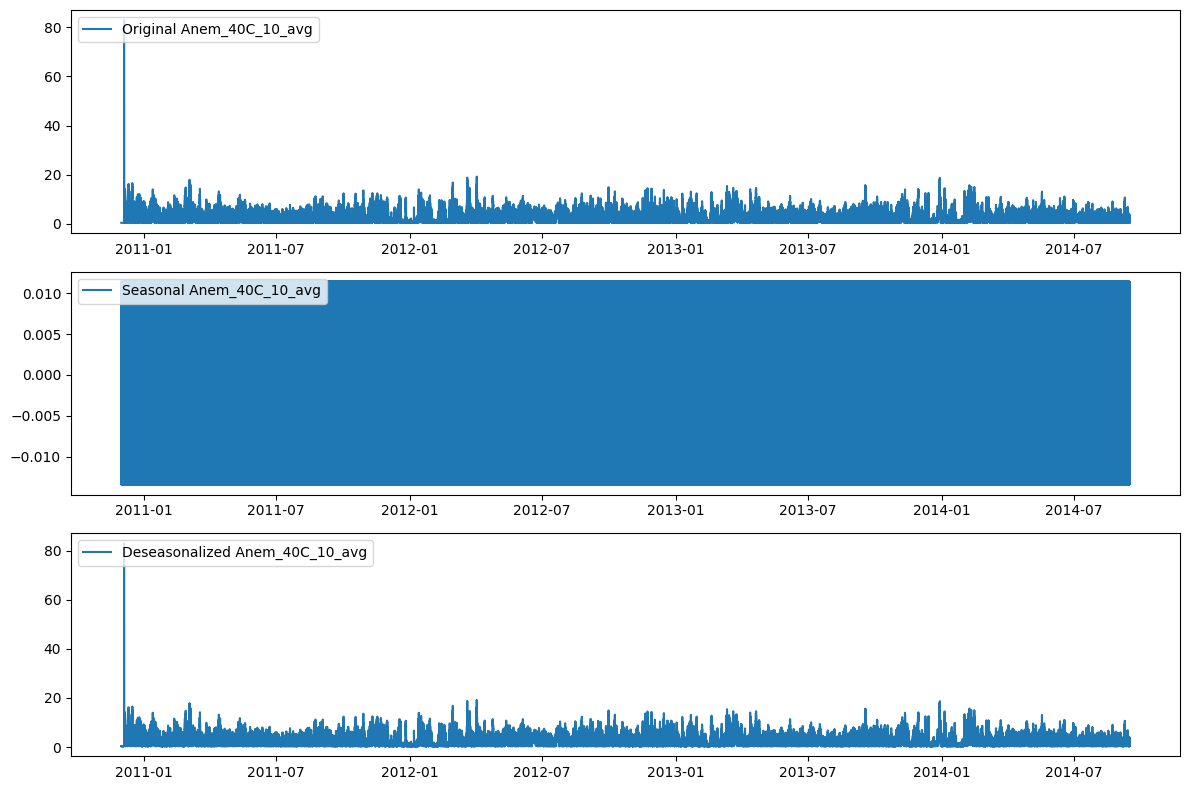

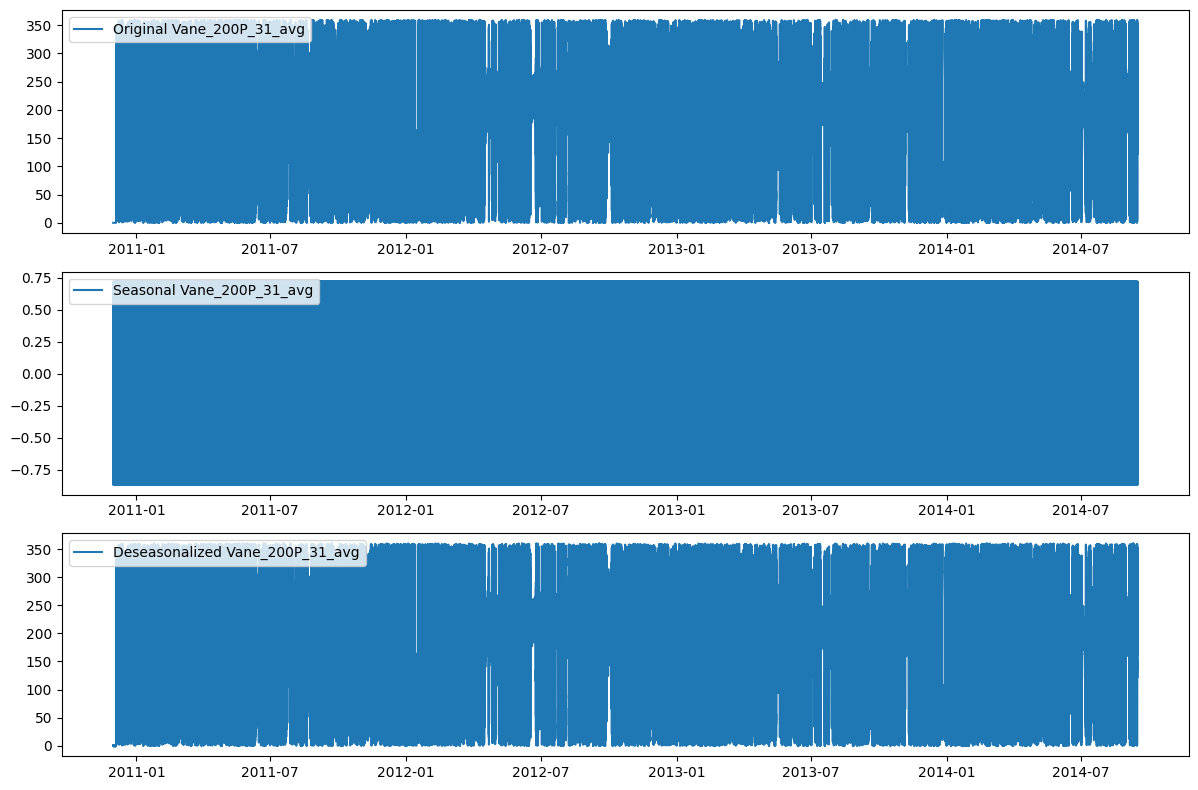

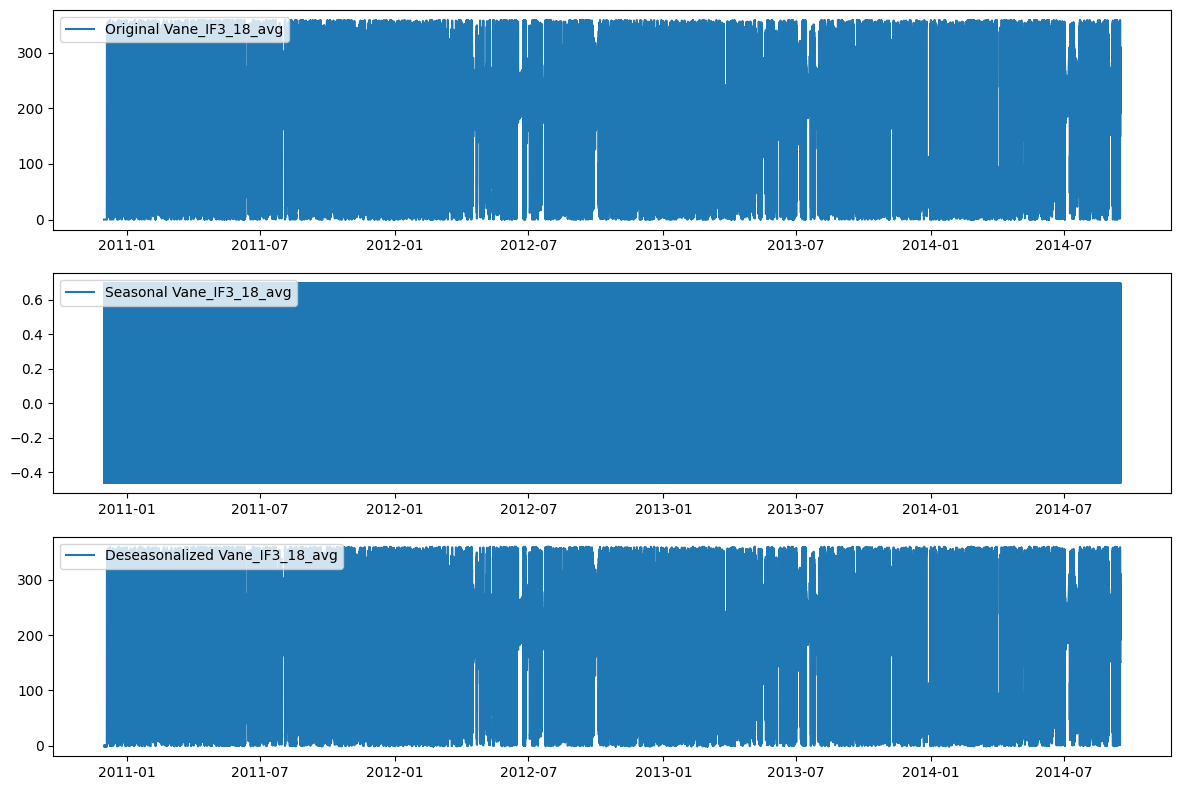

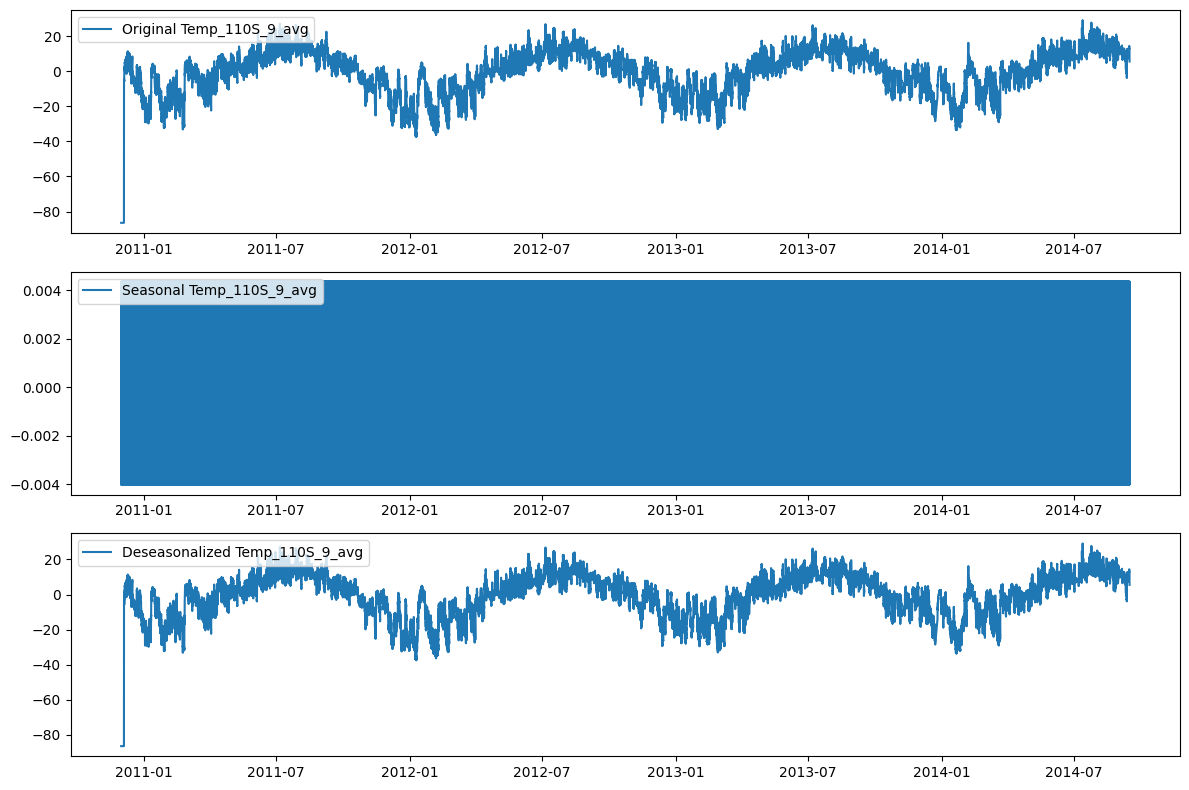

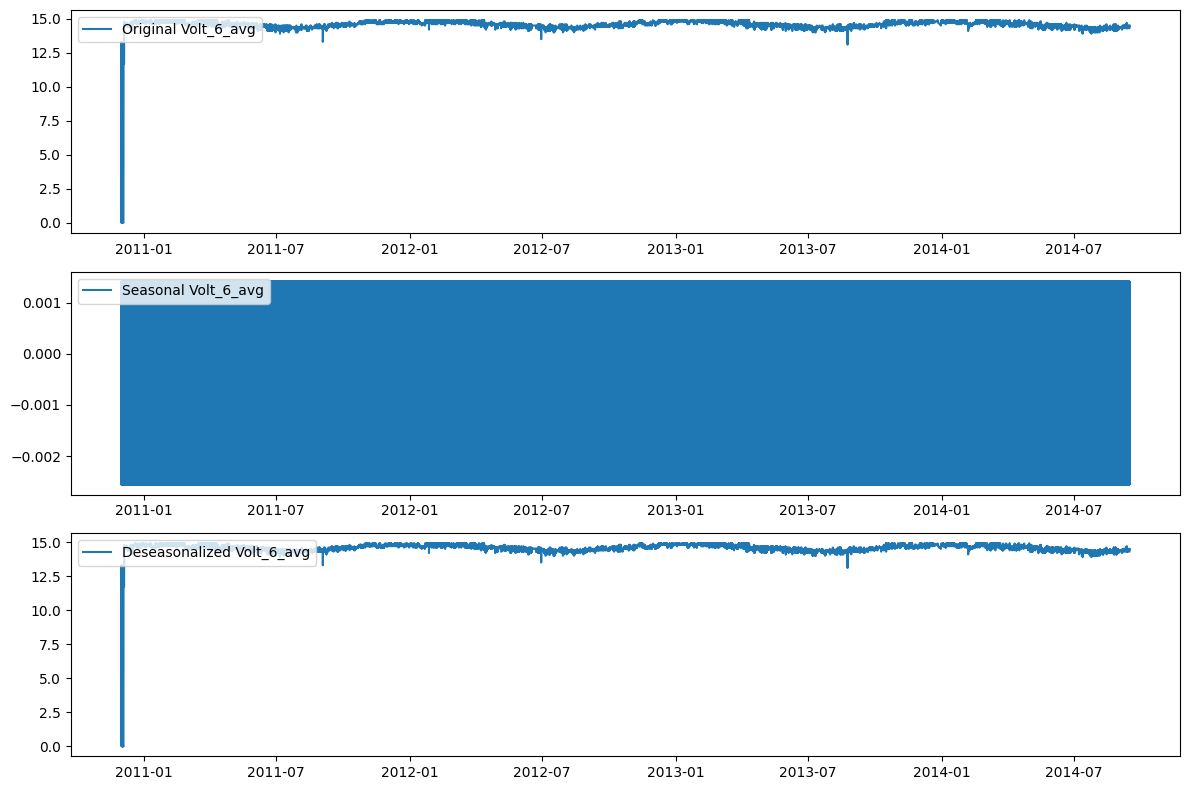

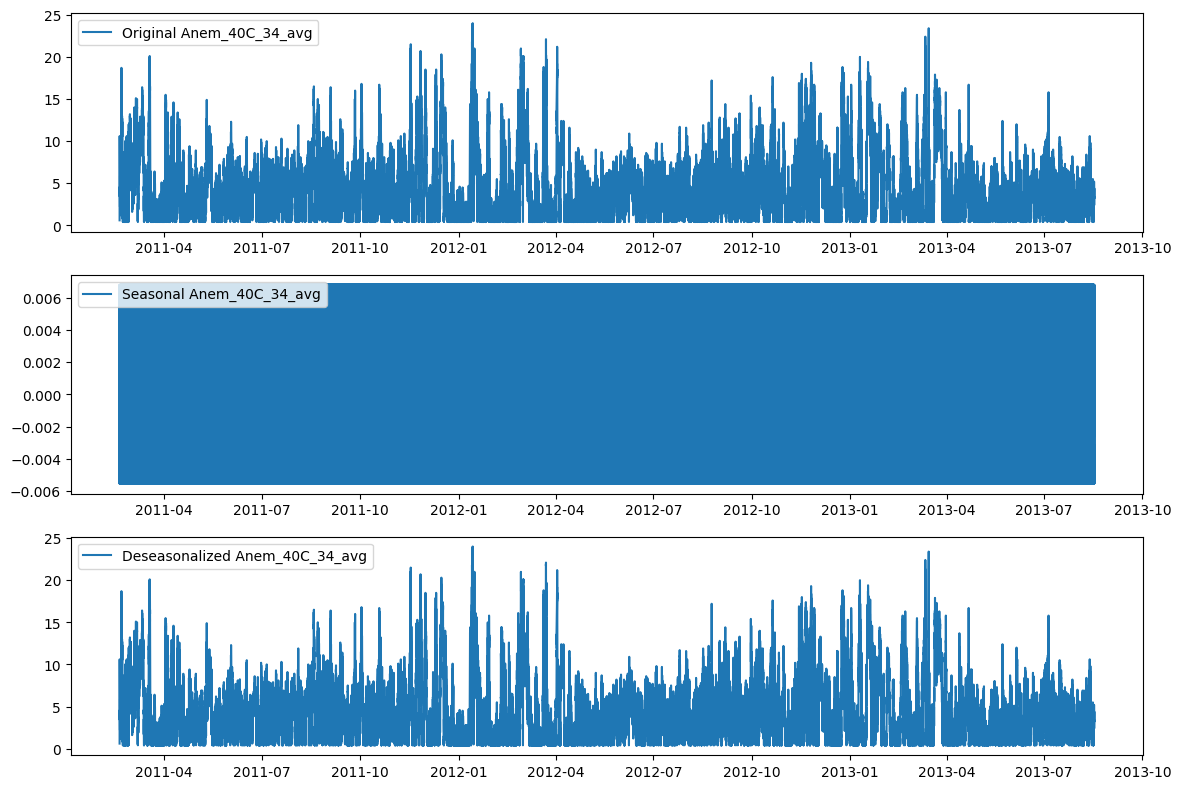

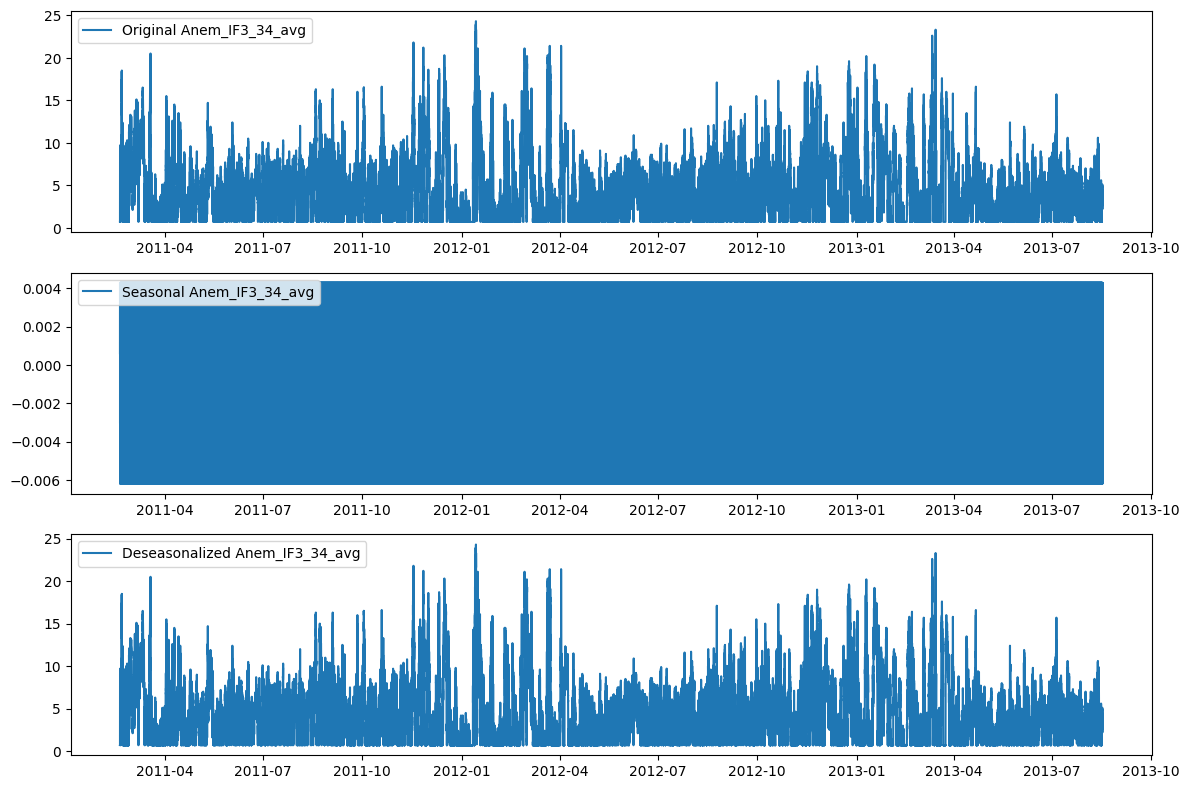

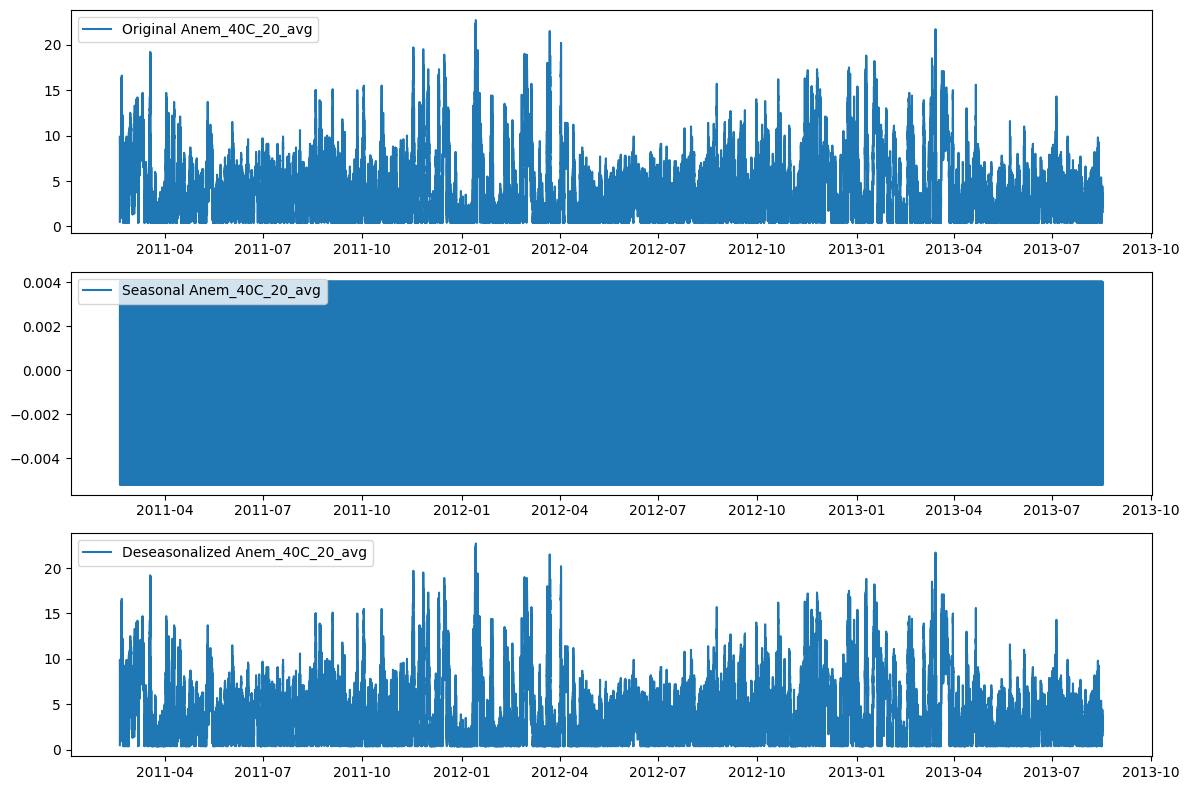

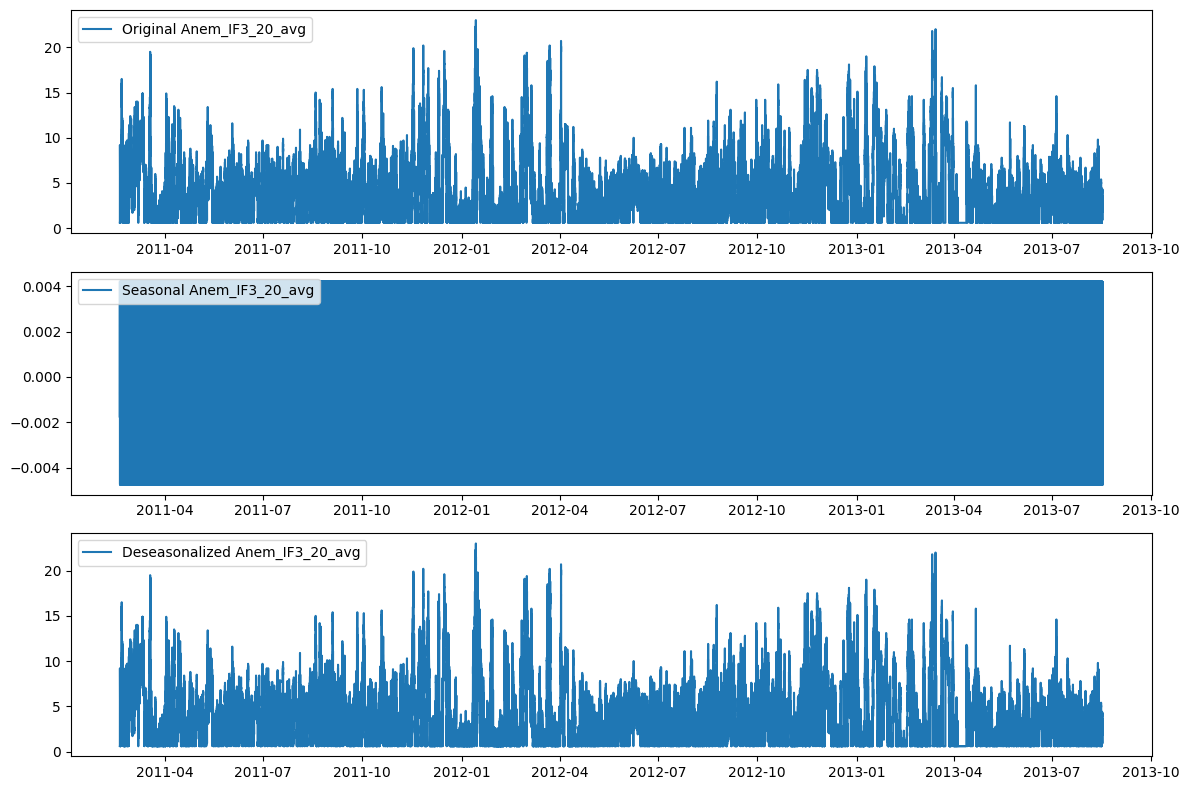

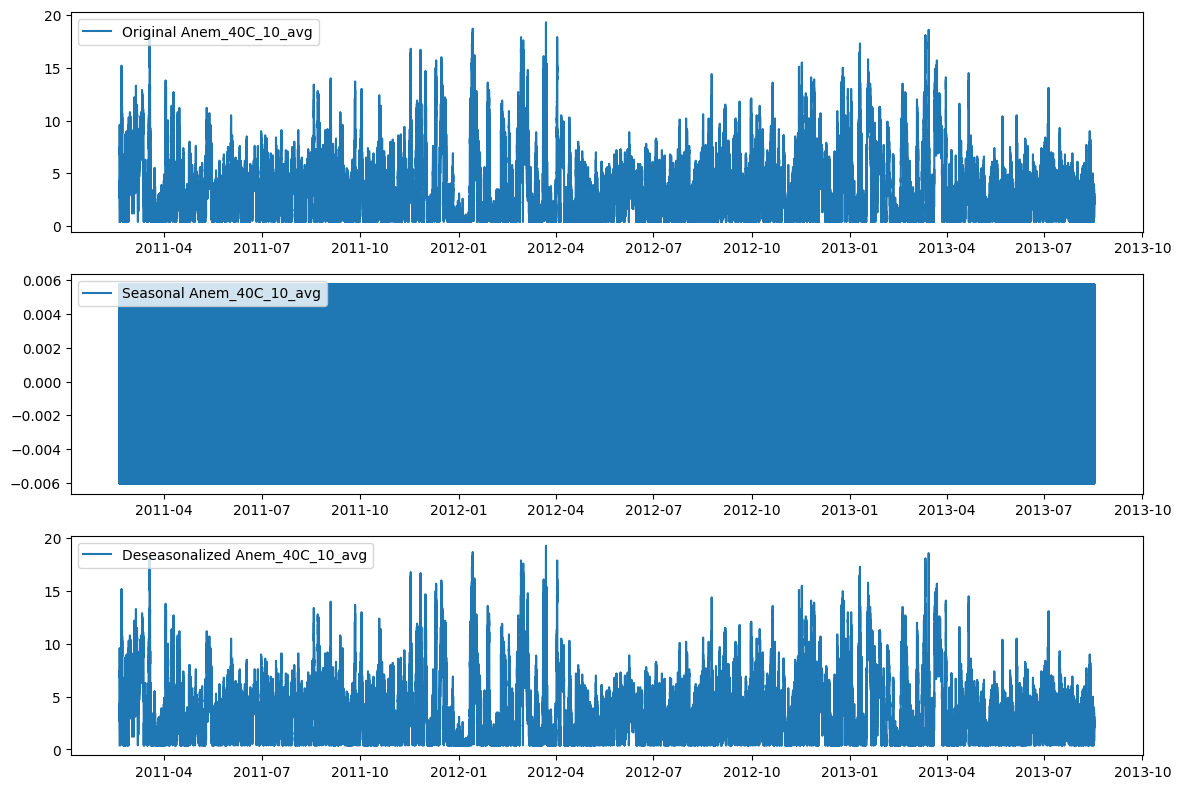

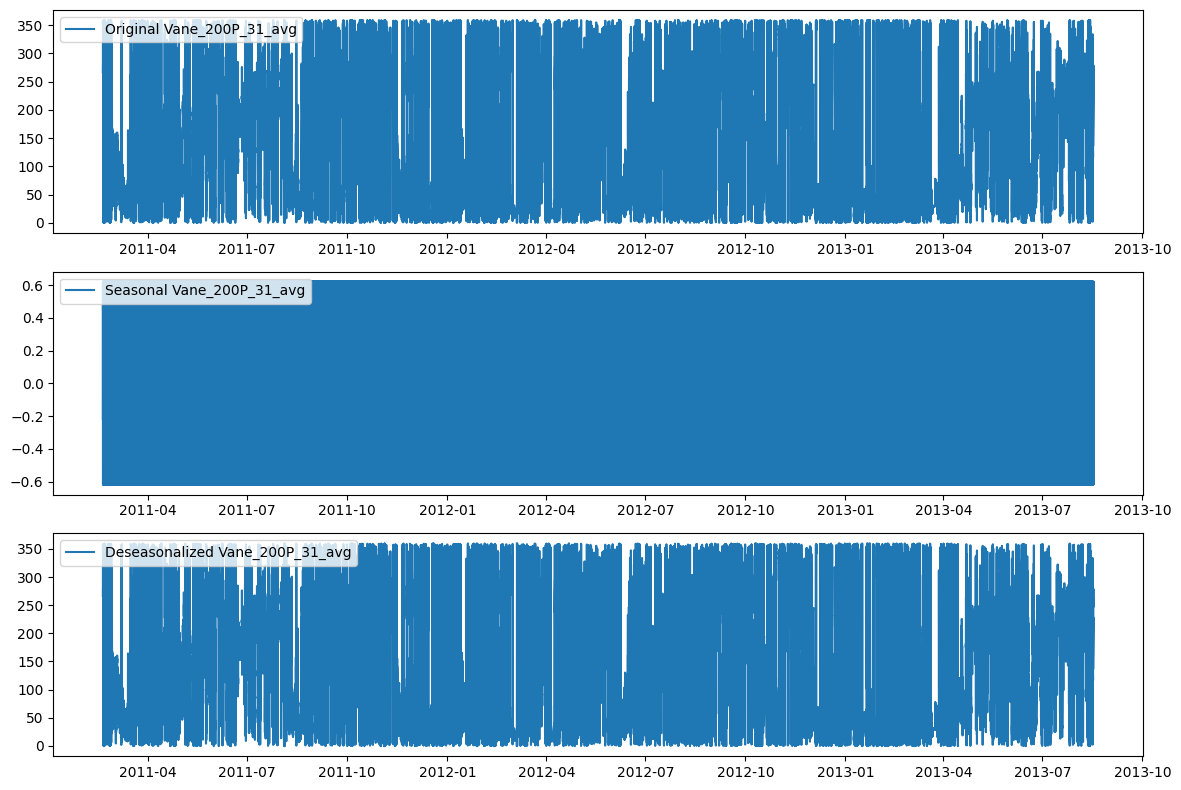

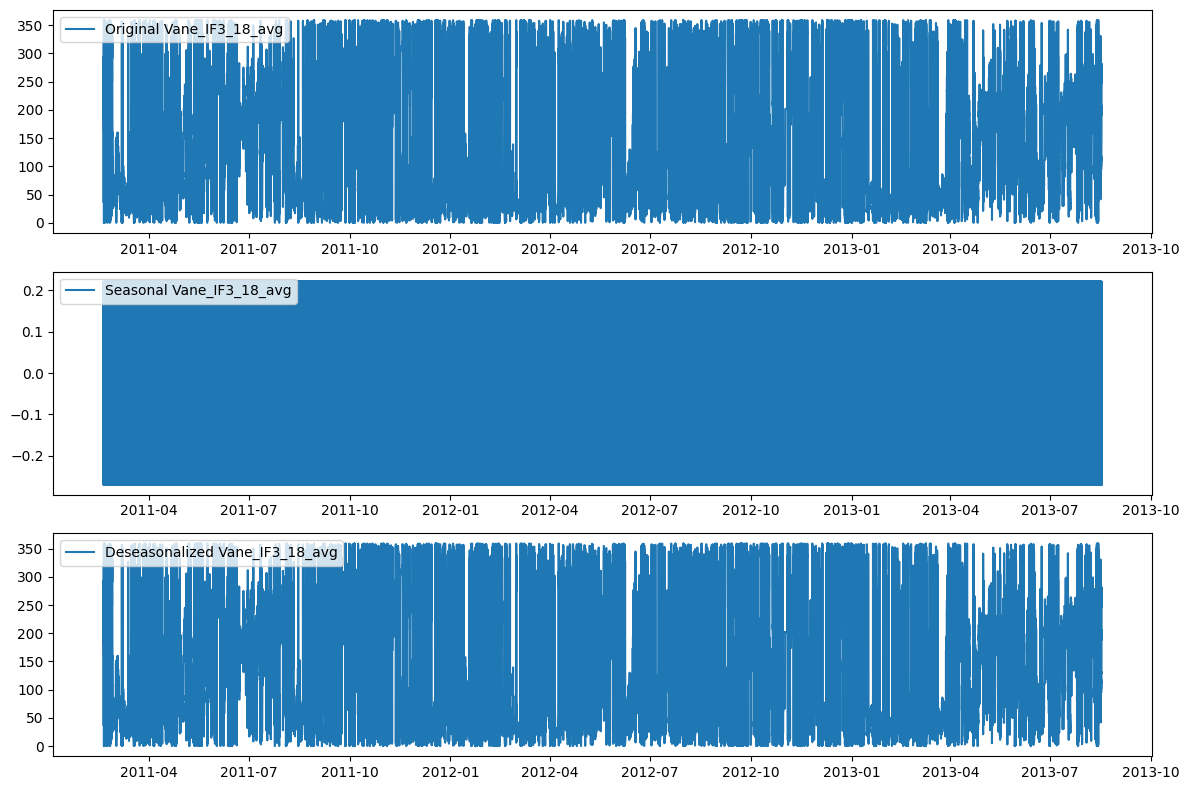

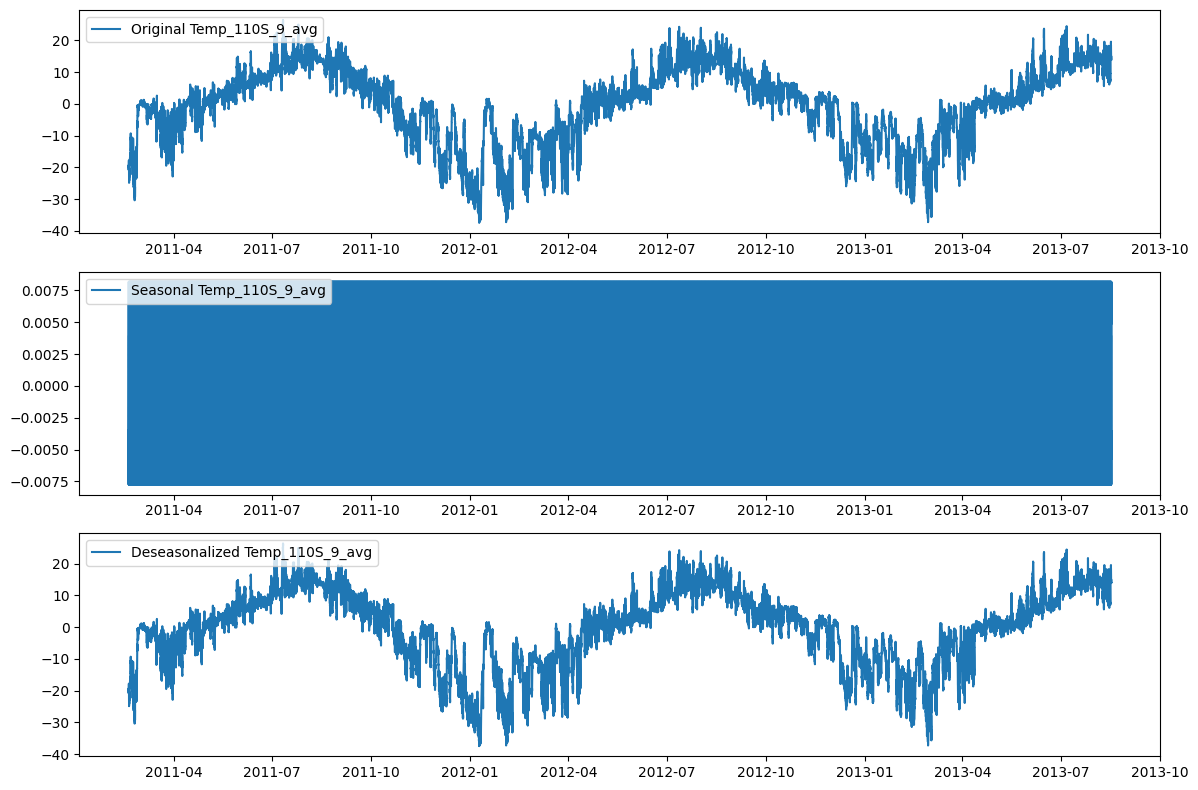

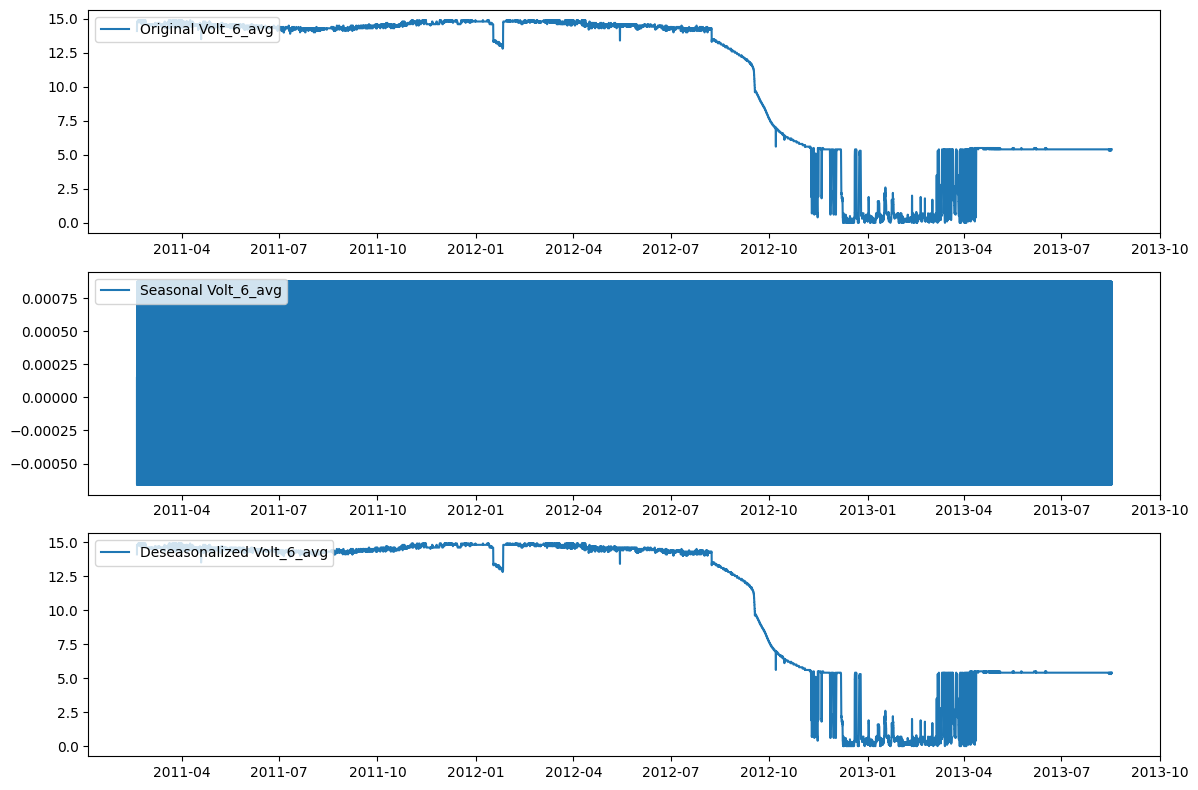

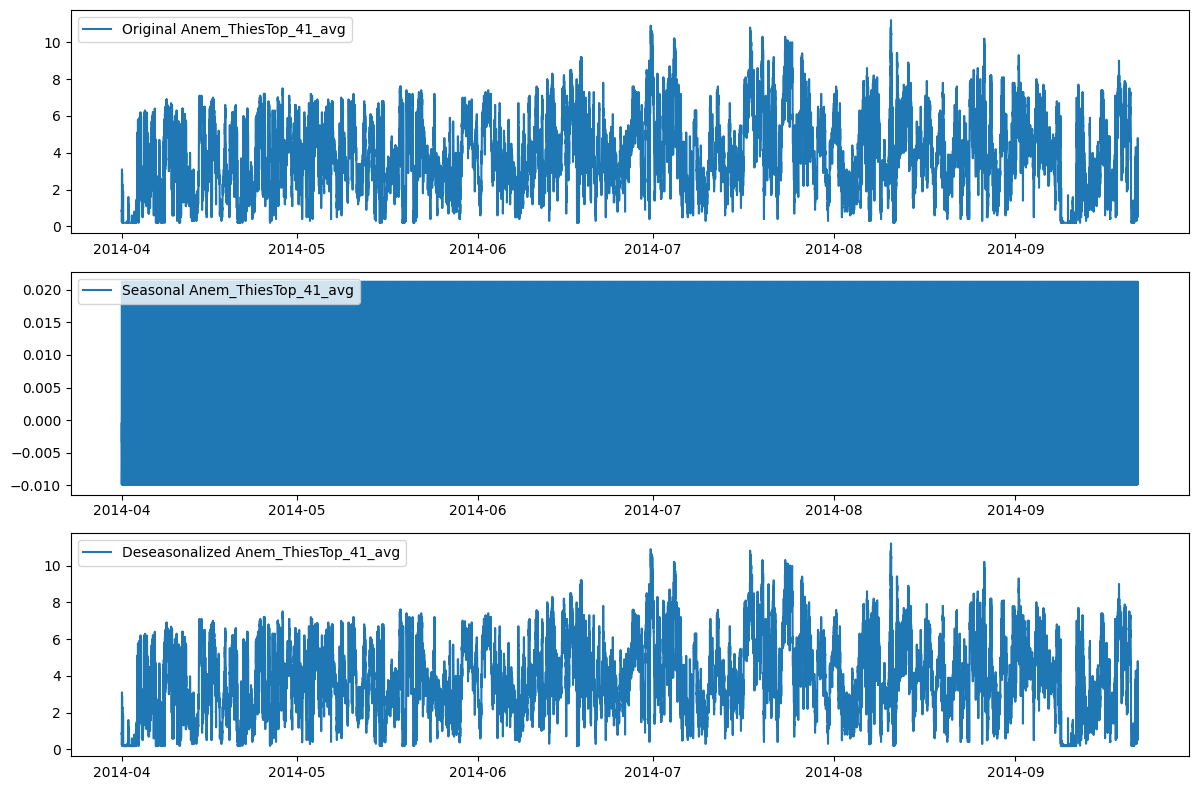

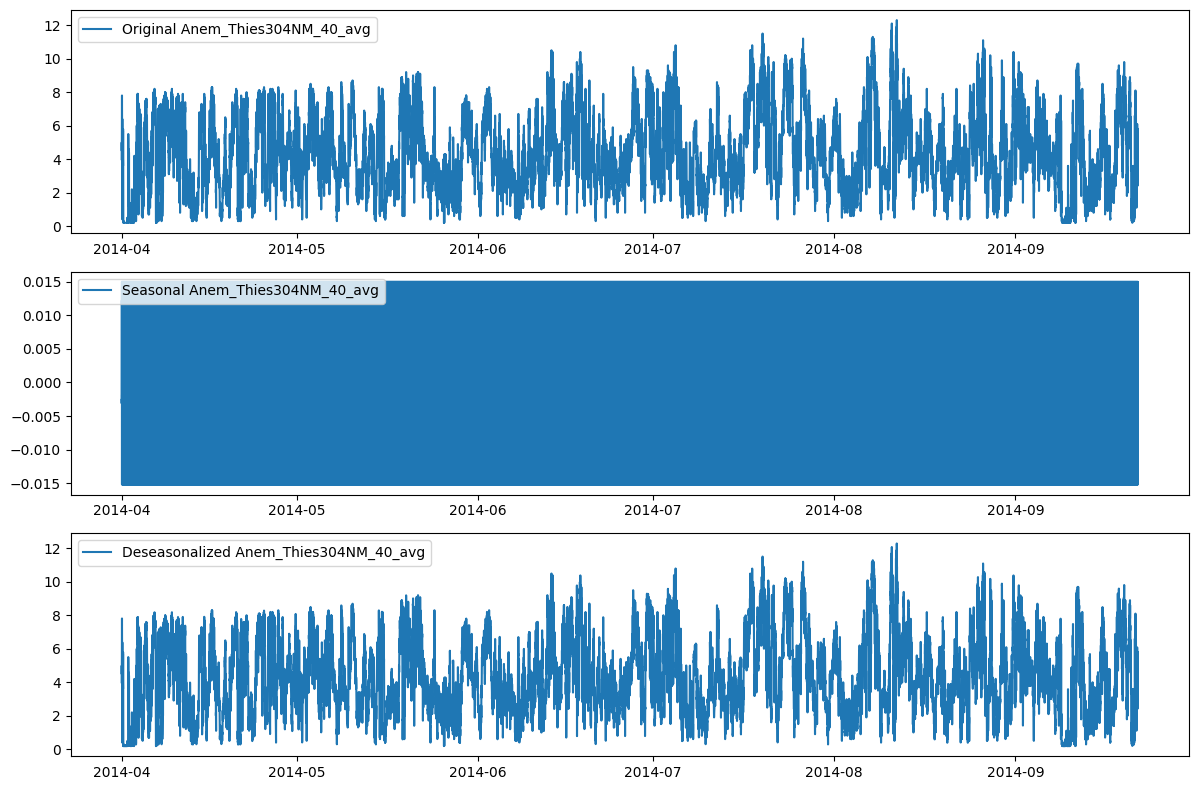

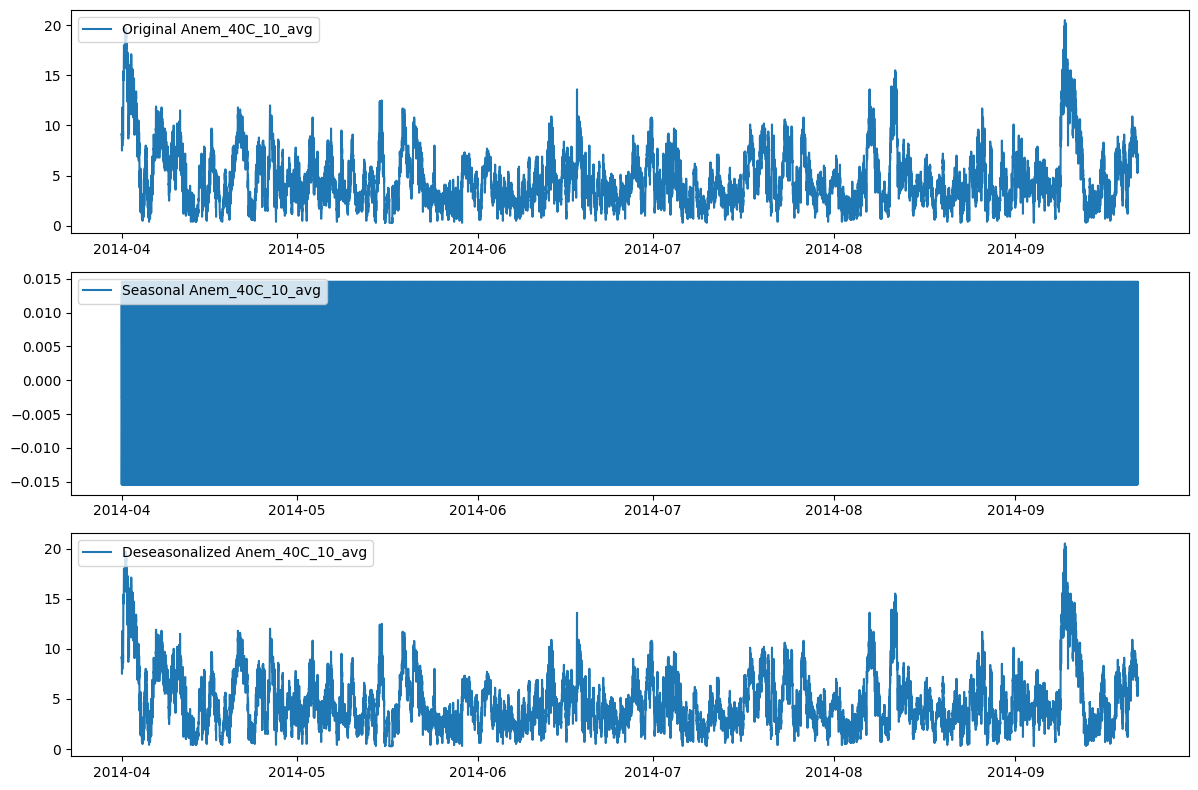

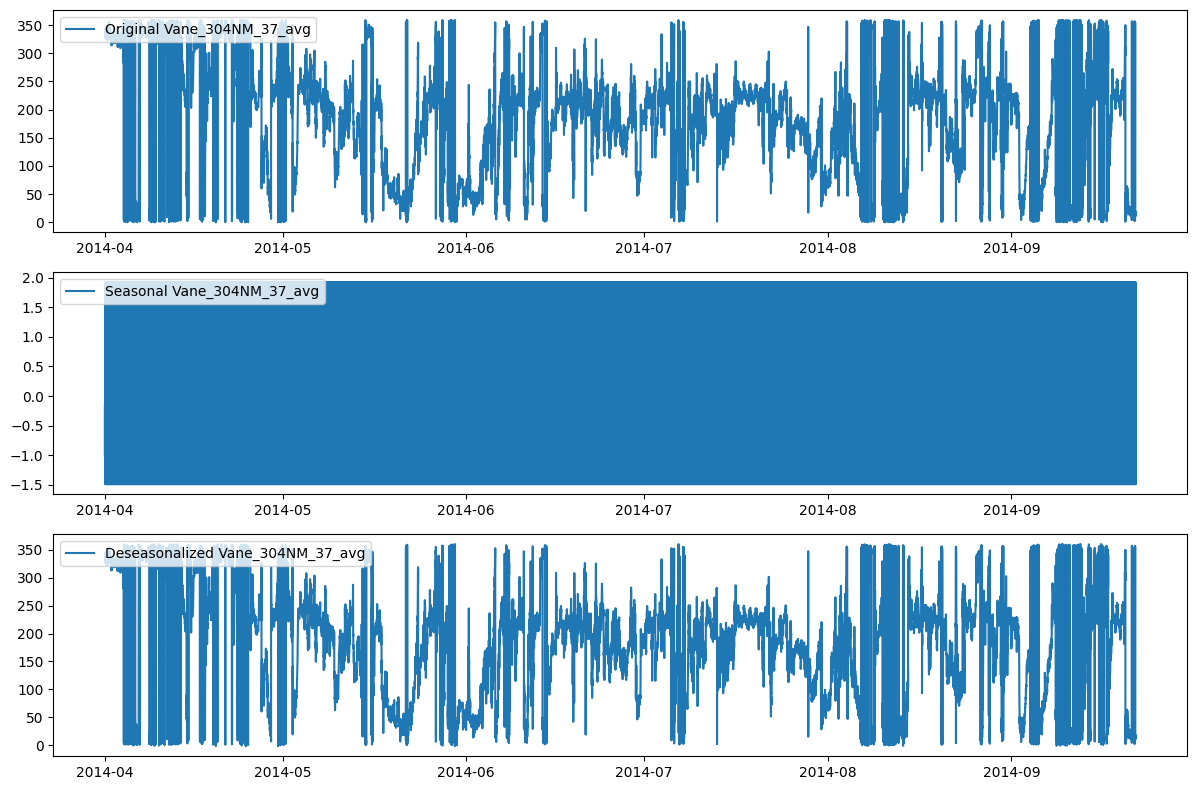

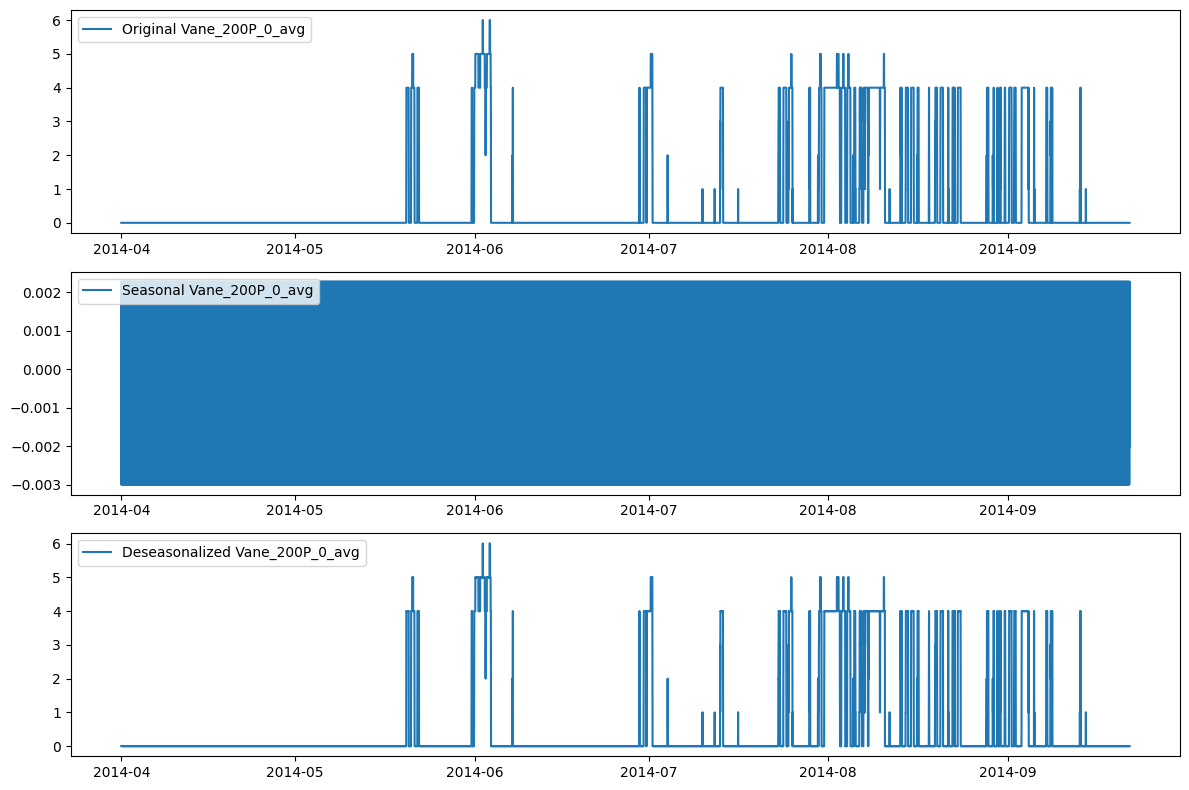

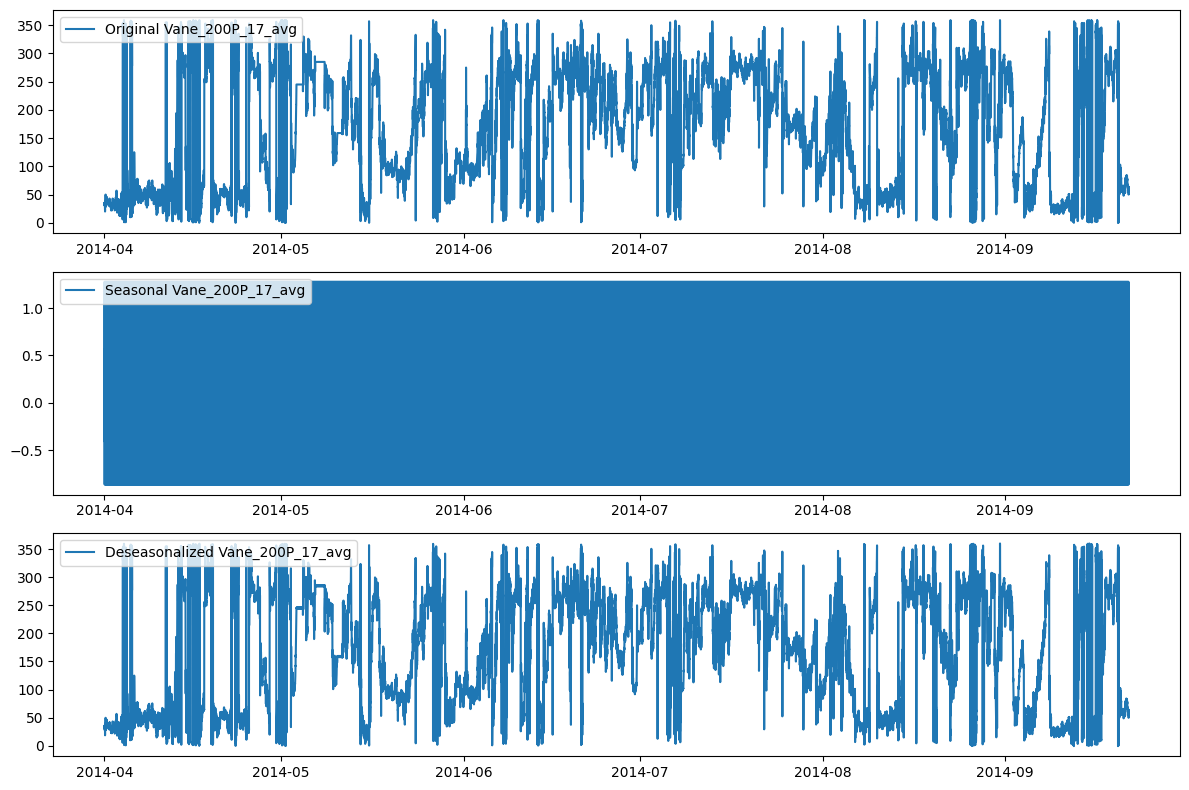

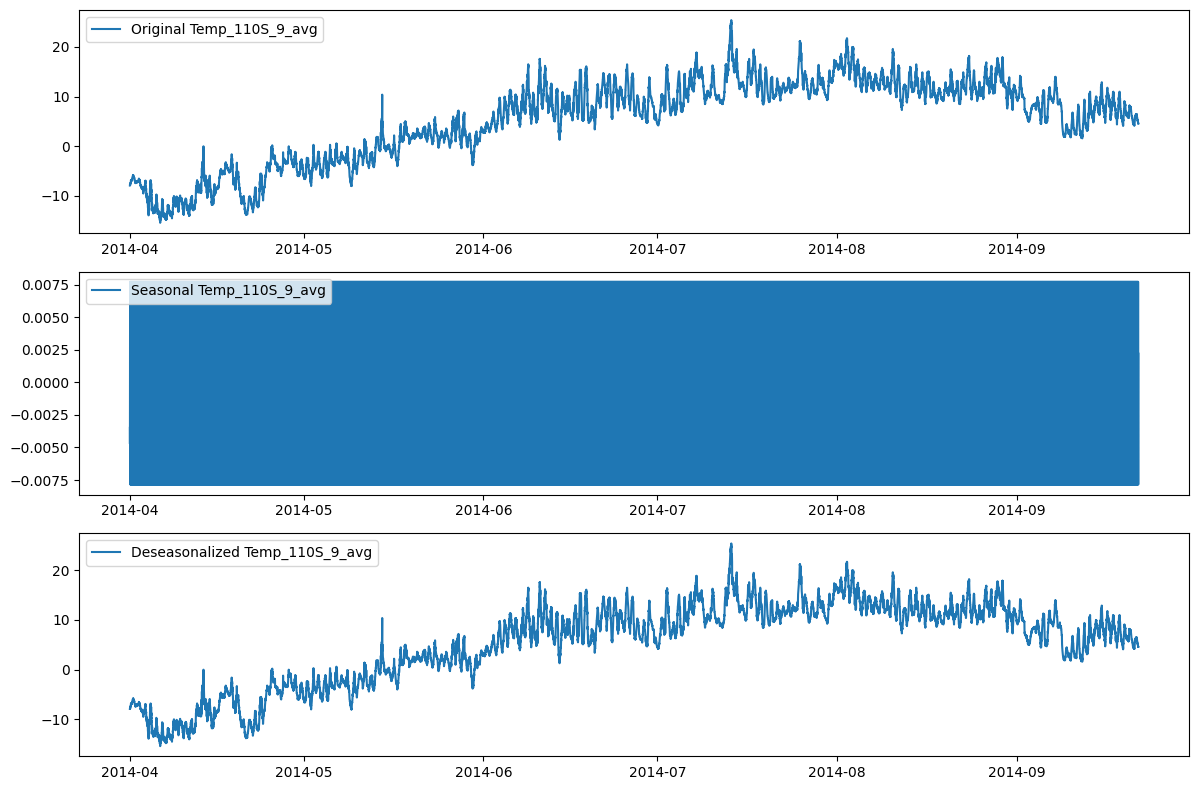

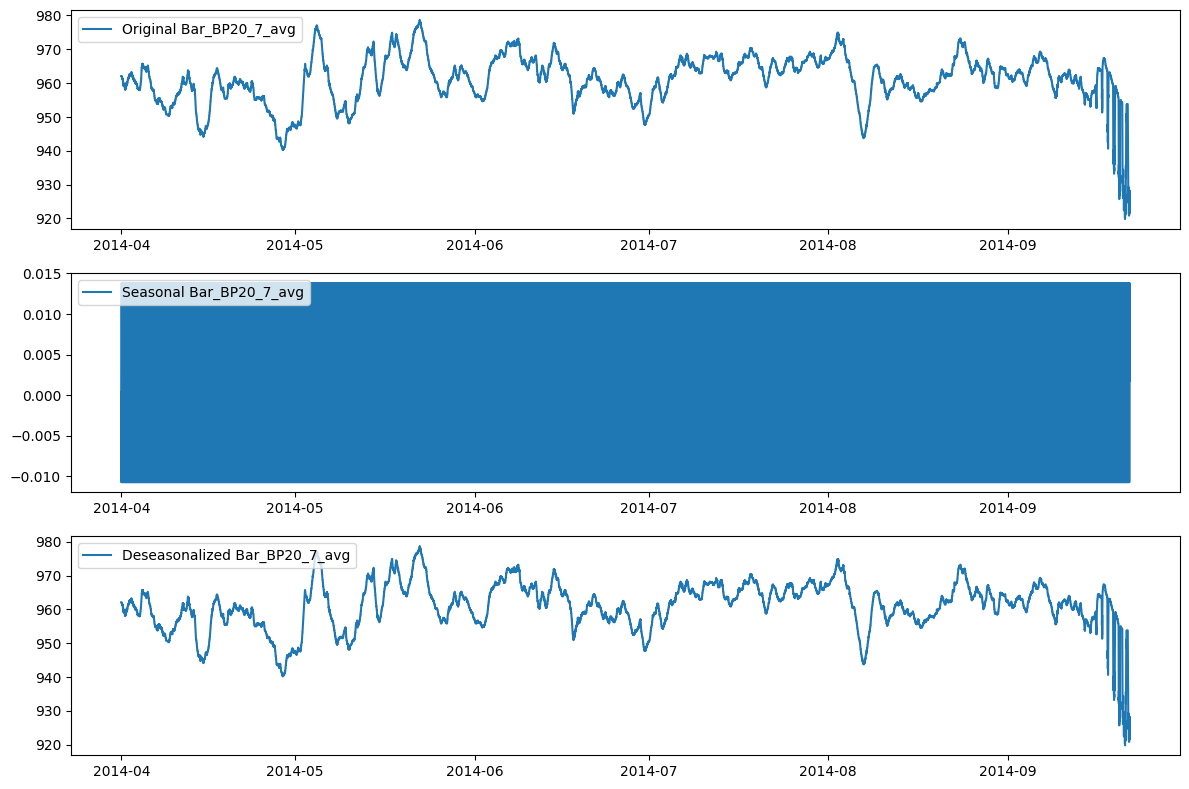

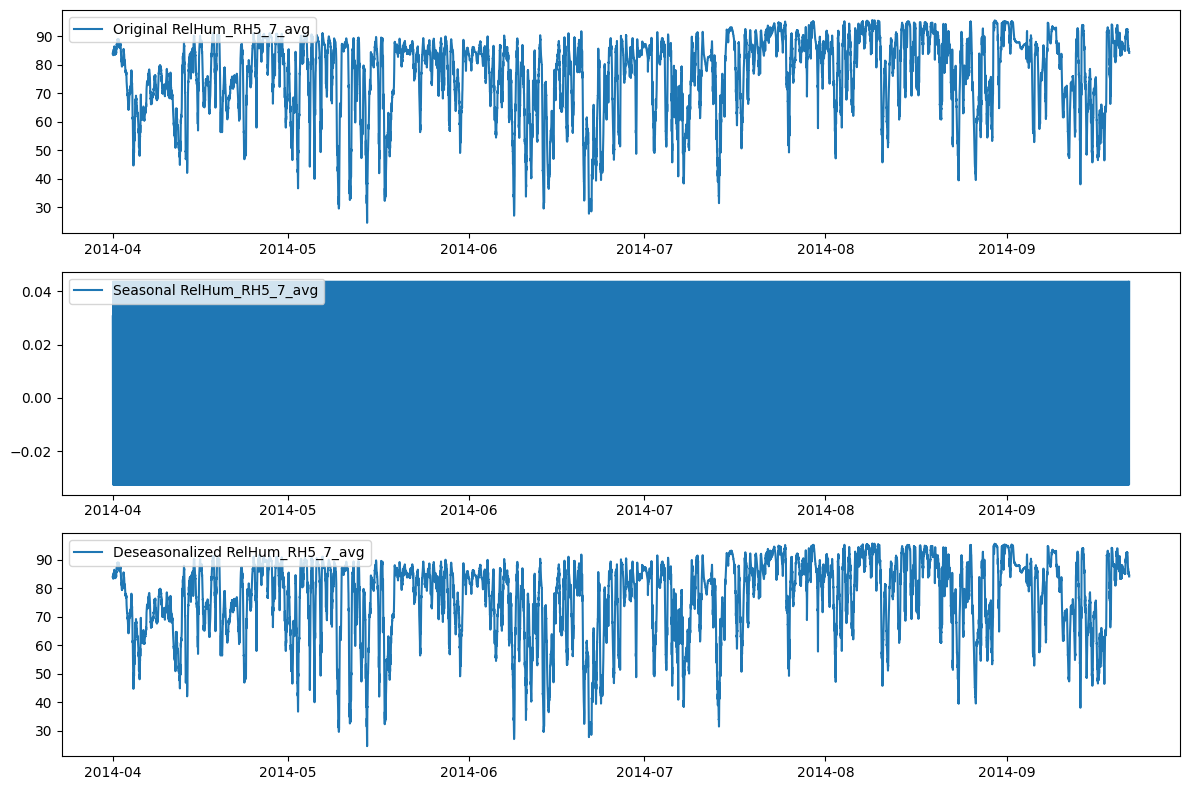

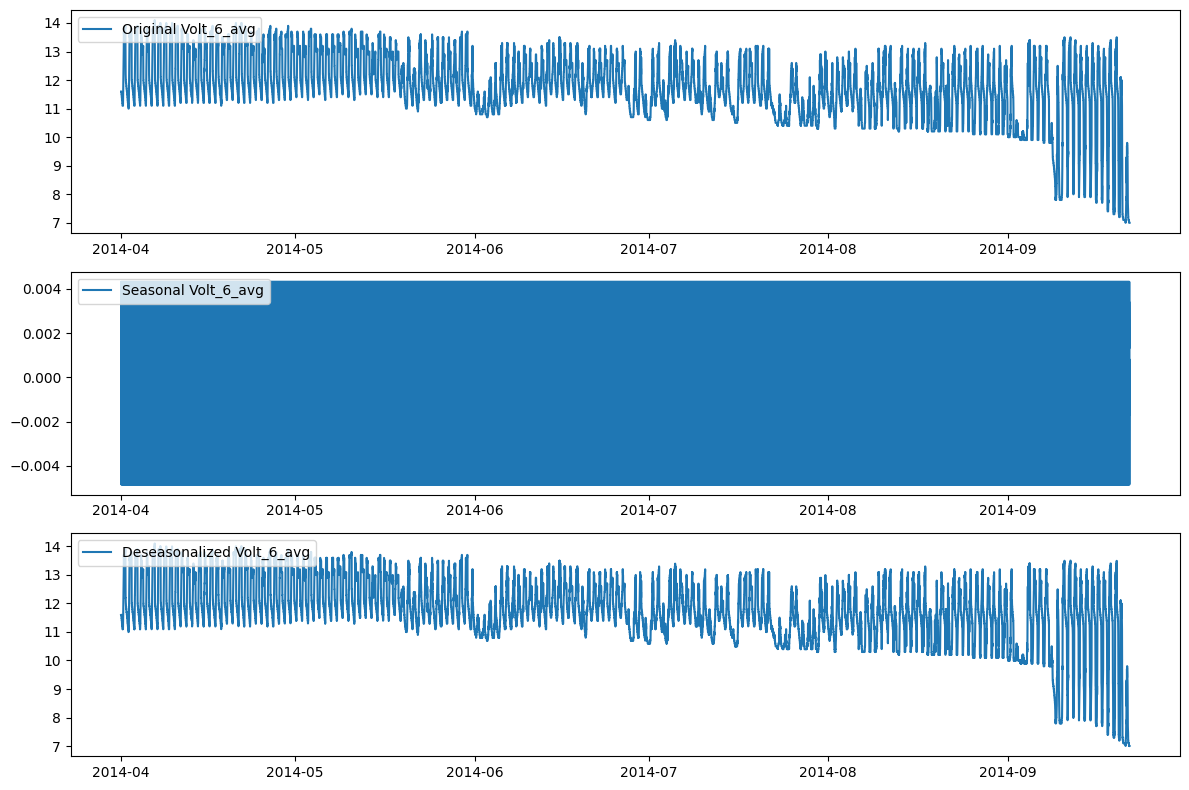

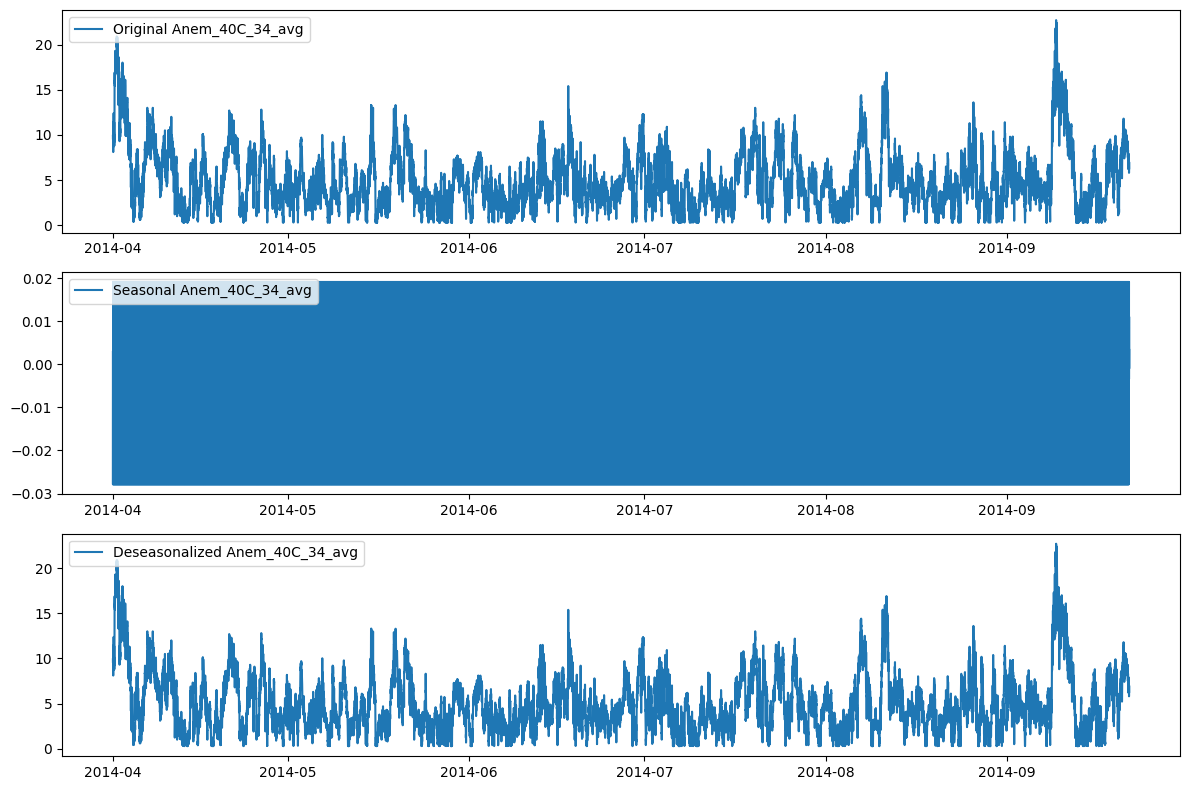

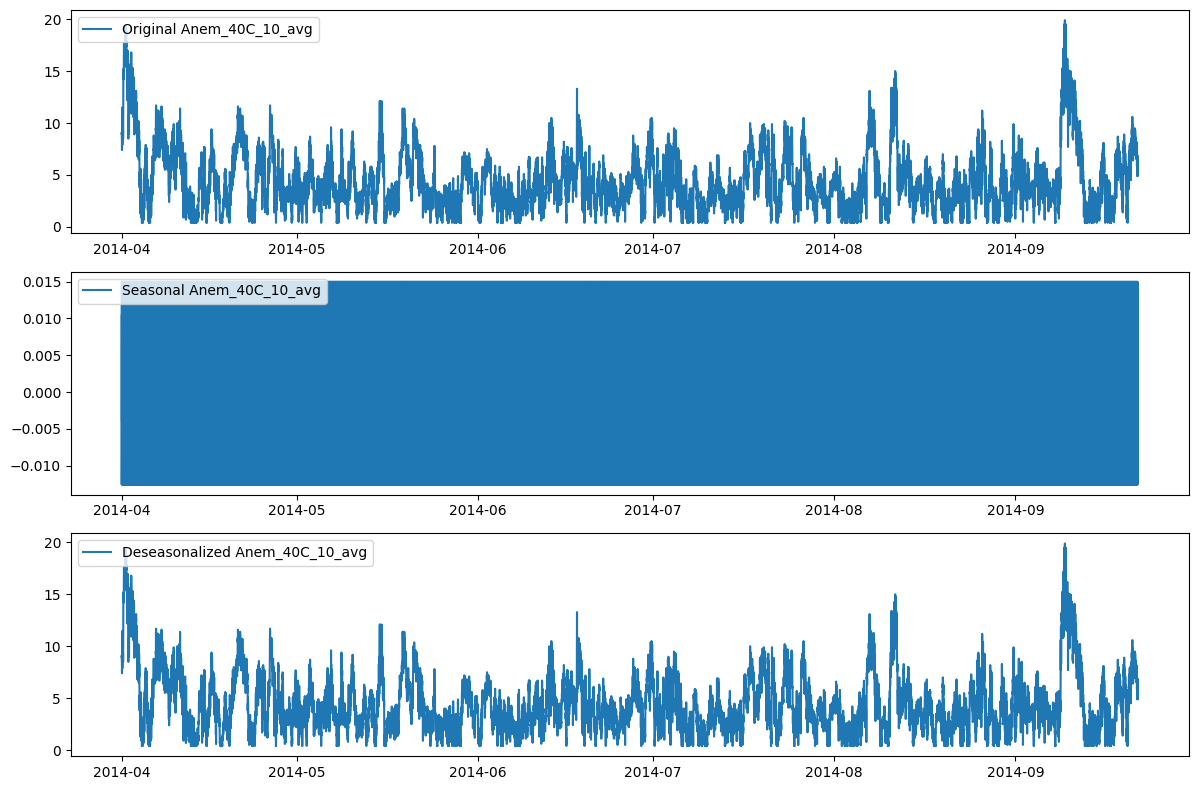

In [19]:
#проходимся по всем файлам и проверяем на сезонность
for output_name in dict_ouput_files:
    defineSeason(output_name)

In [9]:
#исследование данных для разных вышек
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Список столбцов, которые вы хотите извлечь из каждого файла
columns_to_extract = ['Temp_110S_9_avg']  
# Предположим, у вас есть список путей к файлам
file_paths = [dict_ouput_files[0], dict_ouput_files[1], dict_ouput_files[2], dict_ouput_files[3], dict_ouput_files[4]]  # Пример путей к файлам

# Пустой DataFrame для сбора данных
combined_data = pd.DataFrame()

for i, output_name in enumerate(file_paths):
    file_path = directory + output_name + '_int.csv'
    # Чтение файла
    data = pd.read_csv(file_path, usecols=columns_to_extract)
    
    # Добавление суффикса к названиям столбцов, основанного на имени файла или другом уникальном идентификаторе
    suffix = f"_file{i+1}"
    data = data.add_suffix(suffix)

    # Добавление данных в общий DataFrame
    combined_data = pd.concat([combined_data, data], axis=1)


for column in combined_data.columns:
    if combined_data[column].isnull().all():
        print(f"Столбец {column} полностью пустой или содержит только NaN.")

# Преобразование всех данных к числовому типу и обработка NaN
combined_data = combined_data.apply(pd.to_numeric, errors='coerce').fillna(0)
output_file_path = directory + output_name + '_test.csv'
# Сохранение обработанного DataFrame в CSV
combined_data.to_csv(output_file_path, index=False)


In [10]:
# Расчет VIF для каждой переменной
vif_data = pd.DataFrame()
vif_data["feature"] = combined_data.columns
vif_data["VIF"] = [variance_inflation_factor(combined_data.values, i) for i in range(len(combined_data.columns))]

print(vif_data)

                 feature       VIF
0  Temp_110S_9_avg_file1  1.201757
1  Temp_110S_9_avg_file2  1.914735
2  Temp_110S_9_avg_file3  2.079065
3  Temp_110S_9_avg_file4  2.335033
4  Temp_110S_9_avg_file5  1.318014


In [22]:
import pandas as pd
def make_dataset(output_name):
    output_file_path = directory + output_name + '_int_modified.csv'
  
    # Список столбцов, которые вы хотите выбрать
    columns_to_select = ['date', 'Anem_40C_10_avg']
    
    # Чтение CSV файла
    data = pd.read_csv(output_file_path, usecols=columns_to_select)
    
    # Показать первые несколько строк данных
    print(data.head())
    # Сохранение обработанного DataFrame в CSV
    file_path = directory + output_name + '_ready.csv'
    data.to_csv(file_path, index=False)


In [23]:
for output_name in dict_ouput_files:
    make_dataset(output_name)

                  date  Anem_40C_10_avg
0  2014-02-24 00:00:00         0.415037
1  2014-02-24 00:10:00         0.400029
2  2014-02-24 00:20:00         0.386601
3  2014-02-24 00:30:00         0.395353
4  2014-02-24 00:40:00         0.400698
                  date  Anem_40C_10_avg
0  2010-06-23 16:00:00         5.197205
1  2010-06-23 16:10:00         5.503750
2  2010-06-23 16:20:00         5.809654
3  2010-06-23 16:30:00         5.298666
4  2010-06-23 16:40:00         5.594202
                  date  Anem_40C_10_avg
0  2010-11-07 09:50:00         2.496612
1  2010-11-07 10:00:00         2.696288
2  2010-11-07 10:10:00         2.795059
3  2010-11-07 10:20:00         4.598970
4  2010-11-07 10:30:00         5.401995
                  date  Anem_40C_10_avg
0  2010-11-30 14:30:00         0.388603
1  2010-11-30 14:40:00         0.391898
2  2010-11-30 14:50:00         0.395164
3  2010-11-30 15:00:00         0.402608
4  2010-11-30 15:10:00         0.398270
                  date  Anem_40C_10_avg
